#  Introdução

Com o aumento da concorrência e das opções disponíveis no mercado, entender o comportamento dos consumidores se tornou essencial para que as empresas possam se destacar e manter um relacionamento duradouro com seus clientes. A análise de dados tem papel fundamental nesse processo, pois permite transformar grandes volumes de informações em insights que ajudam a compreender melhor quem são os consumidores, o que compram, quando e por quê.

Dentro desse contexto, a **segmentação de clientes** surge como uma estratégia importante para identificar grupos de consumidores com características e comportamentos semelhantes. A partir dessa identificação, é possível direcionar ações de marketing mais eficazes, personalizar ofertas e melhorar a experiência do cliente.

Neste projeto, será realizada uma análise exploratória do conjunto de dados **Consumer Behavior and Shopping Habits Dataset**, disponível no [Kaggle](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset). Esses dados reúnem informações detalhadas sobre o perfil e os hábitos de compra de diferentes consumidores, incluindo aspectos demográficos, histórico de compras, preferências por produtos, uso de descontos, tipo de entrega, entre outros fatores.

A ideia central é compreender como essas variáveis se relacionam e identificar padrões de comportamento que possam ser utilizados para dividir os consumidores em grupos (ou segmentos) com características semelhantes. Essa etapa inicial de exploração dos dados será fundamental para embasar futuras análises mais aprofundadas, como modelos de **clusterização** e **predição de comportamento de compra**. Basicamente, o objetivo principal é extrair perfis de clientes via clusterização, que possam ser utilizados para orientar estratégias de marketing e vendas mais direcionadas e eficazes.


#  Descrição do Conjunto de Dados

O conjunto de dados reúne informações sobre o perfil e os hábitos de compra de diferentes consumidores, tanto em lojas físicas quanto em canais online. Ele foi construído com o objetivo de oferecer uma visão ampla sobre o comportamento do cliente, permitindo análises relacionadas à **segmentação**, **fidelização** e **preferências de consumo**.

A seguir, está a descrição detalhada de cada variável presente no dataset:

| Variável                  | Descrição                                                       |
| ------------------------- | --------------------------------------------------------------- |
| **Customer ID**           | Identificador único de cada cliente.                            |
| **Age**                   | Idade do cliente.                                               |
| **Gender**                | Gênero do cliente.                                              |
| **Item Purchased**        | Nome do produto adquirido.                                      |
| **Category**              | Categoria do produto (exemplo: roupas, eletrônicos, alimentos). |
| **Purchase Amount (USD)** | Valor gasto na compra, em dólares.                              |
| **Location**              | Local onde a compra foi realizada.                              |
| **Size**                  | Tamanho do produto, quando aplicável.                           |
| **Color**                 | Cor do produto adquirido.                                       |
| **Season**                | Estação do ano associada à compra.                              |
| **Review Rating**         | Avaliação dada pelo cliente ao produto.                         |
| **Subscription Status**    | Indica se o cliente possui uma assinatura ativa.                |
| **Shipping Type**          | Tipo de entrega utilizado (ex.: padrão, expresso).              |
| **Discount Applied**       | Indica se foi aplicado algum desconto na compra.                |
| **Promo Code Used**        | Informa se foi utilizado um código promocional.                 |
| **Previous Purchases**     | Número de compras anteriores do cliente.                        |
| **Payment Method**         | Método de pagamento utilizado (ex.: cartão, dinheiro).          |
| **Frequency of Purchases** | Frequência com que o cliente realiza compras.                   |




<a id="cd"></a>

# 1) Carregamento dos dados

In [47]:
import numpy as np
import pandas as pd
import kagglehub
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from plotnine import ggplot, aes, geom_bar, geom_text, labs, theme_minimal, theme, coord_flip, scale_fill_brewer, geom_histogram, geom_boxplot, facet_wrap


path = kagglehub.dataset_download("zeesolver/consumer-behavior-and-shopping-habits-dataset")

df = pd.read_csv(f'{path}/shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


<a id="eda"></a>

## 2) Análise Exploratória

Nessa etapa inicial, o objetivo é explorar o conjunto de dados para entender sua estrutura, identificar padrões e detectar possíveis problemas que possam afetar análises futuras.

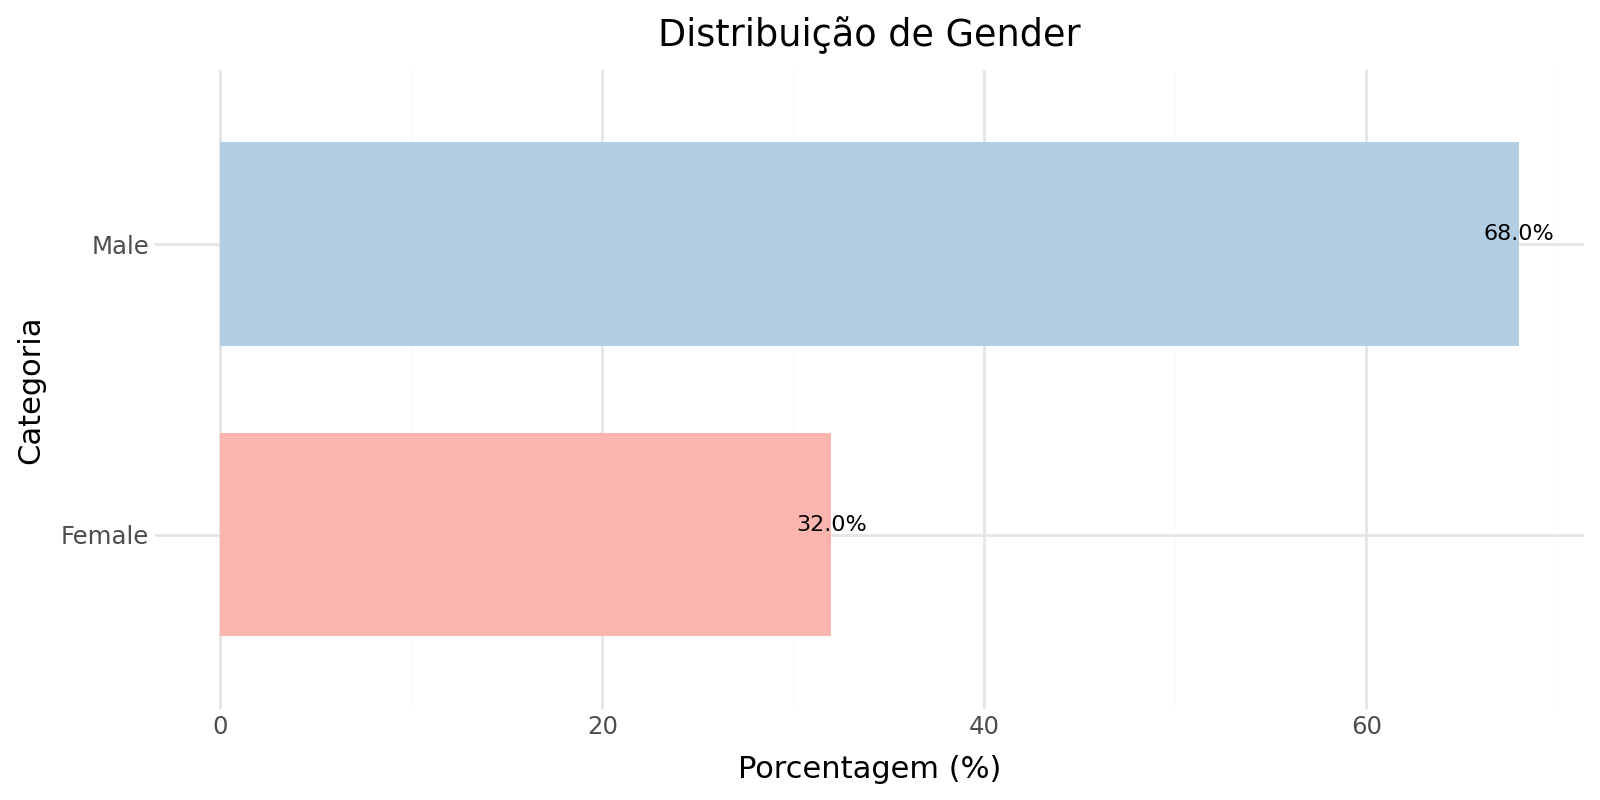

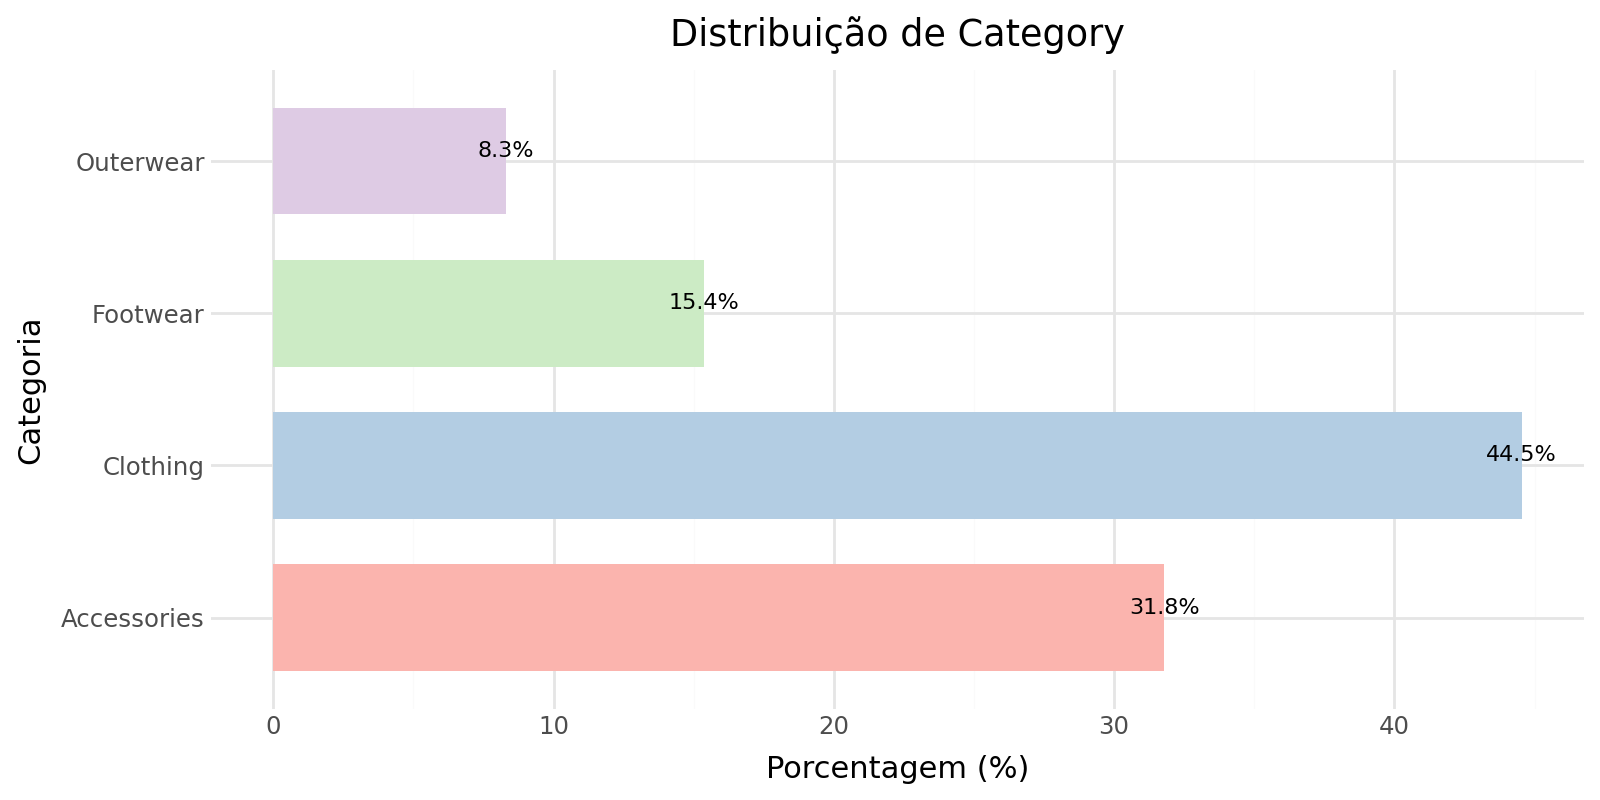

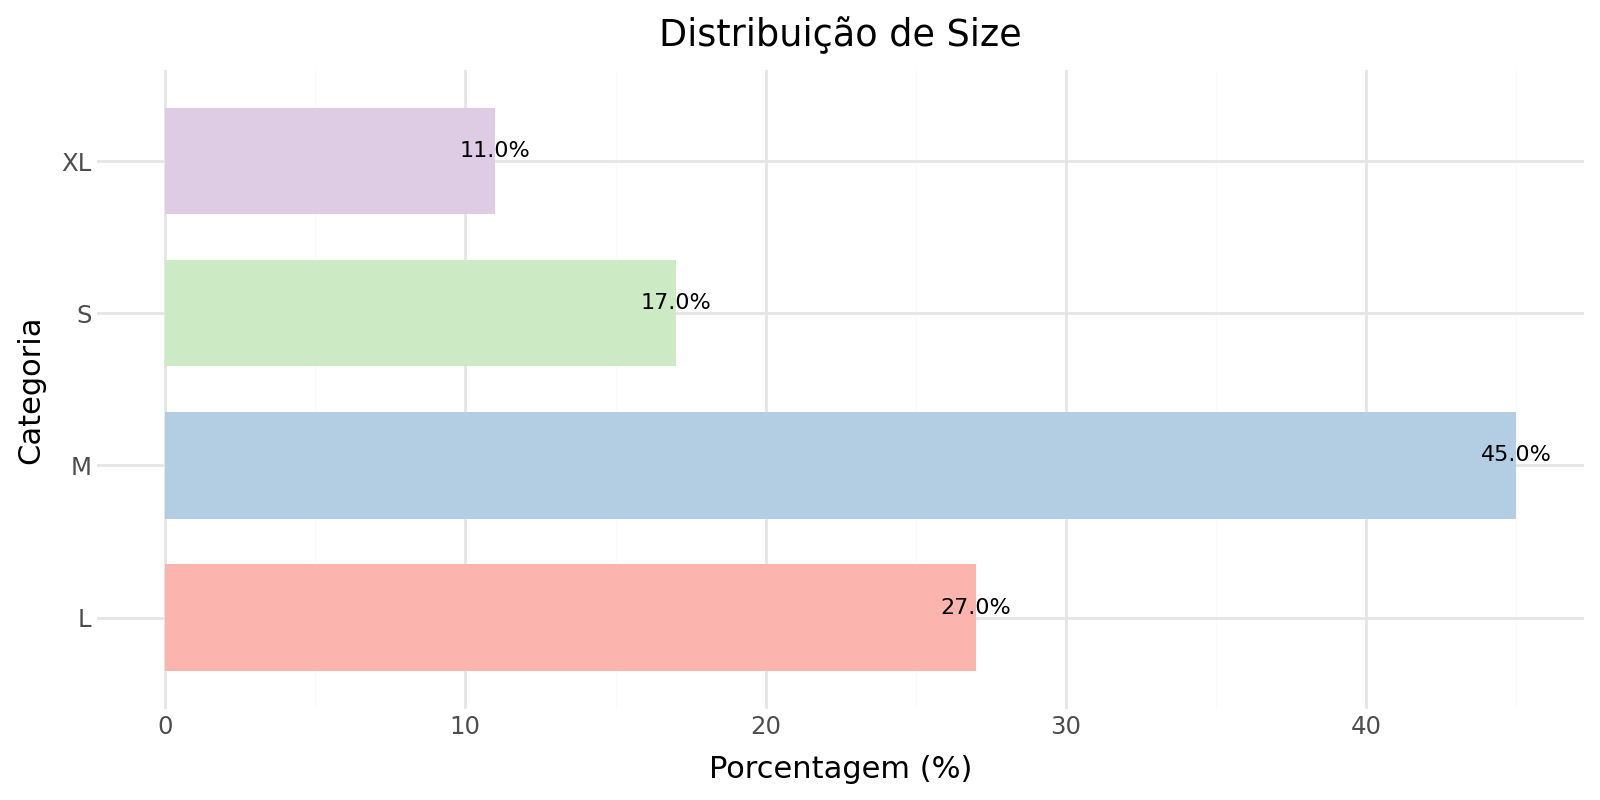

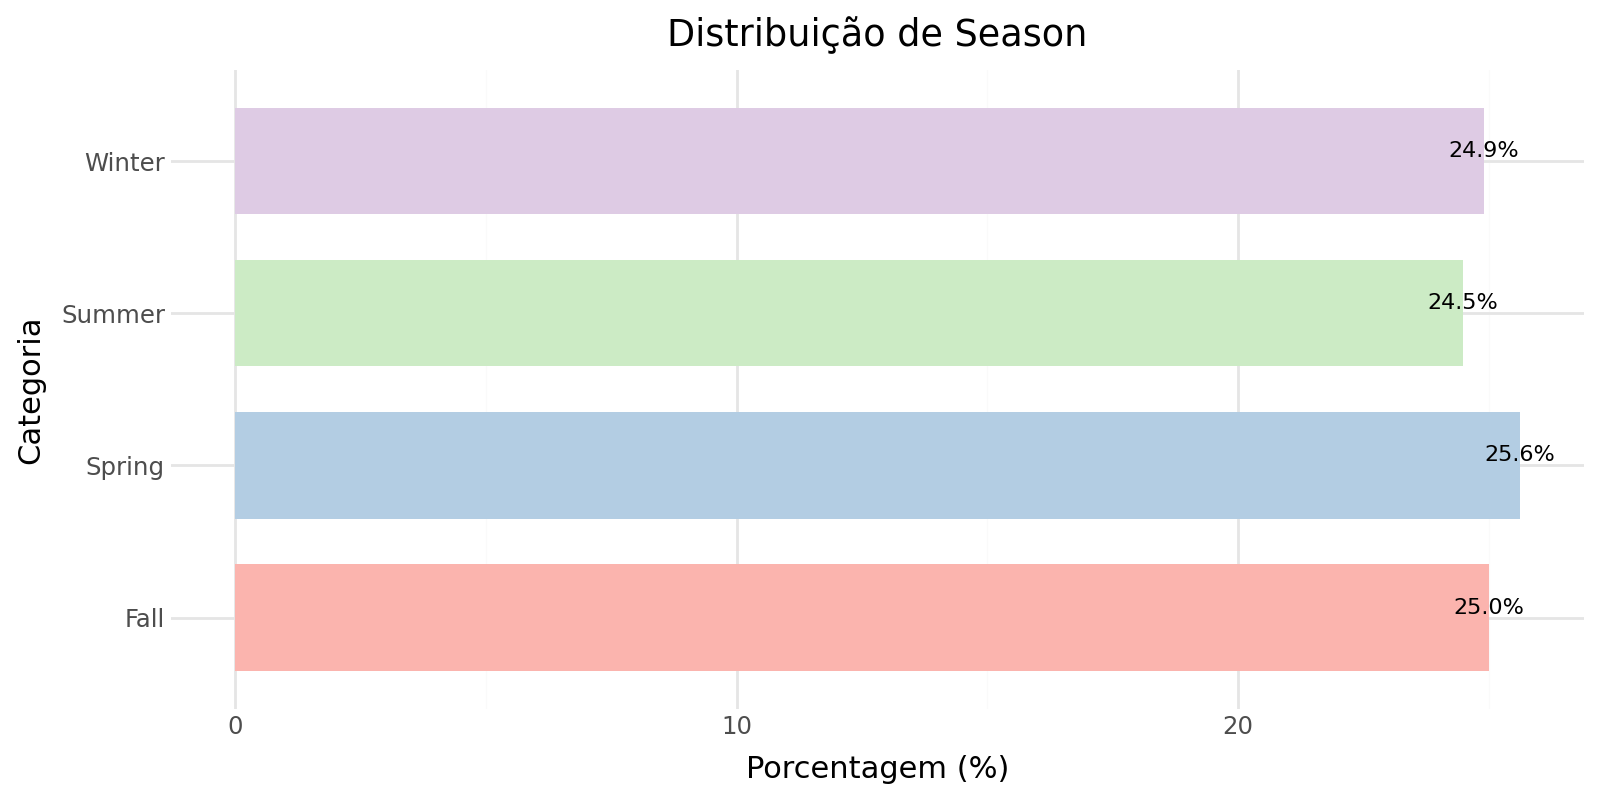

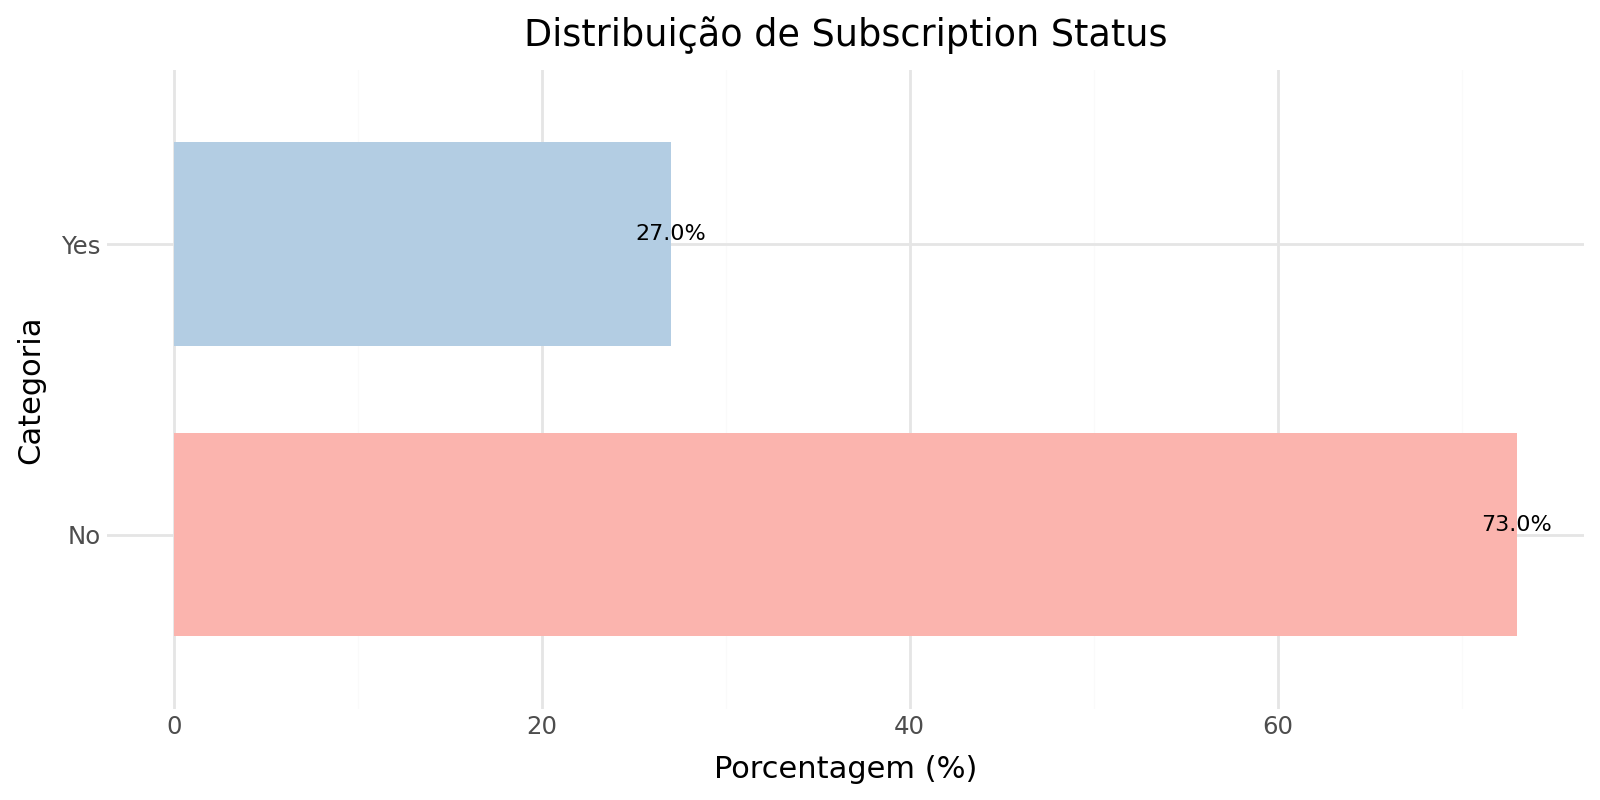

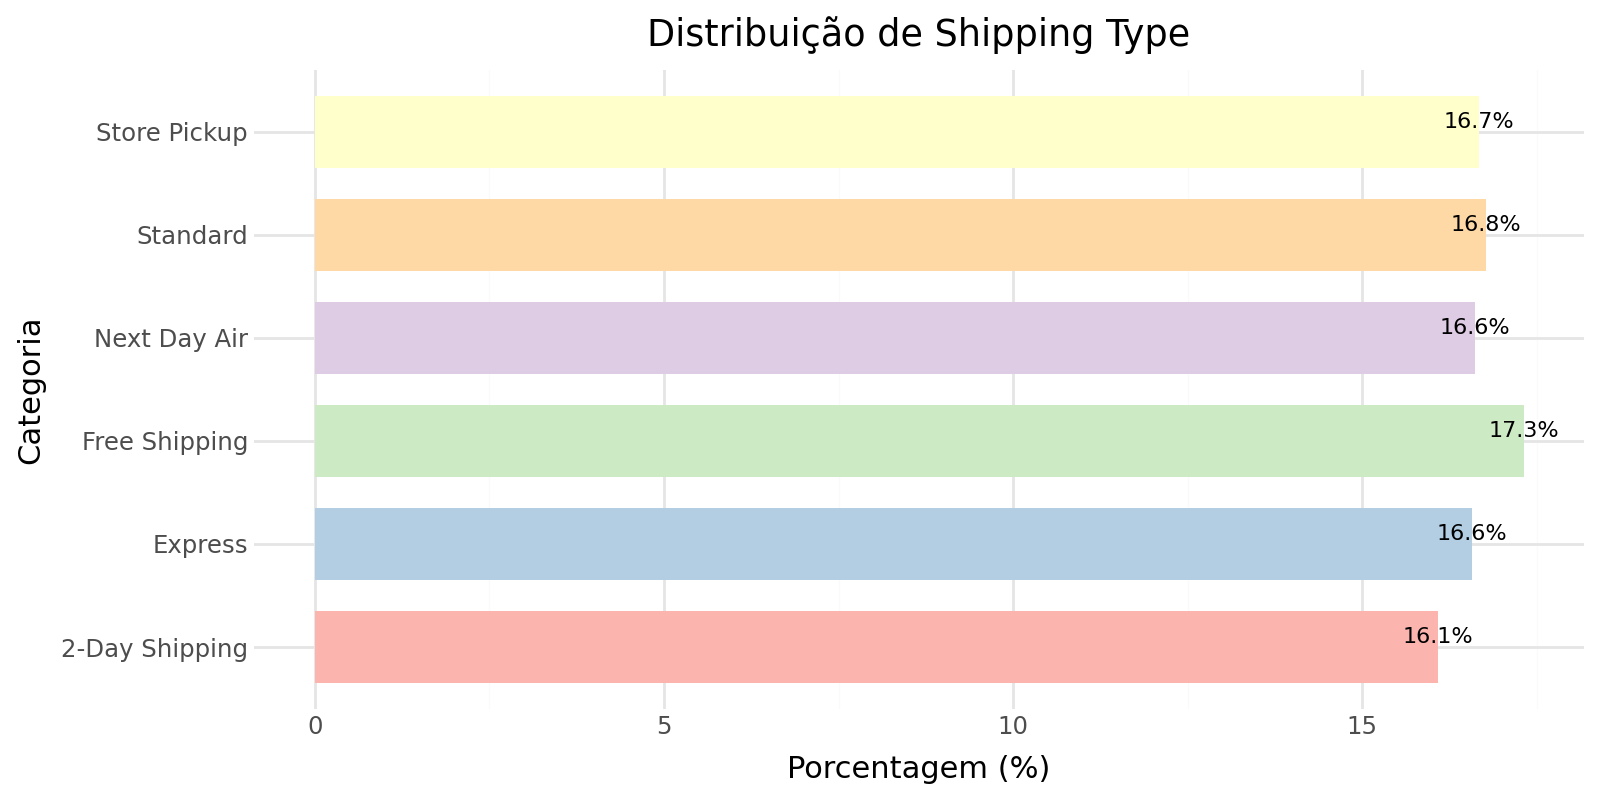

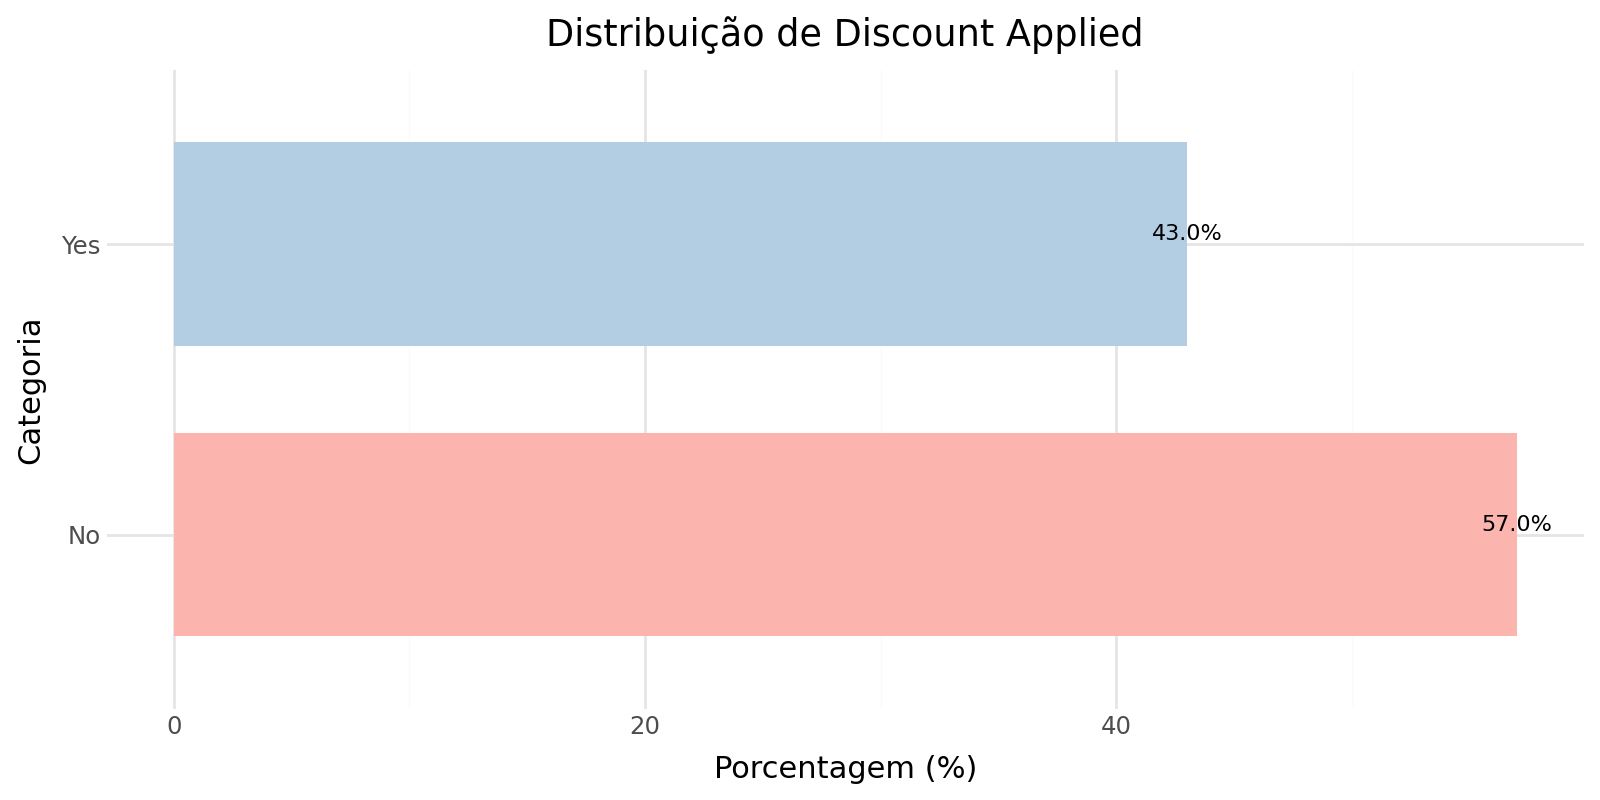

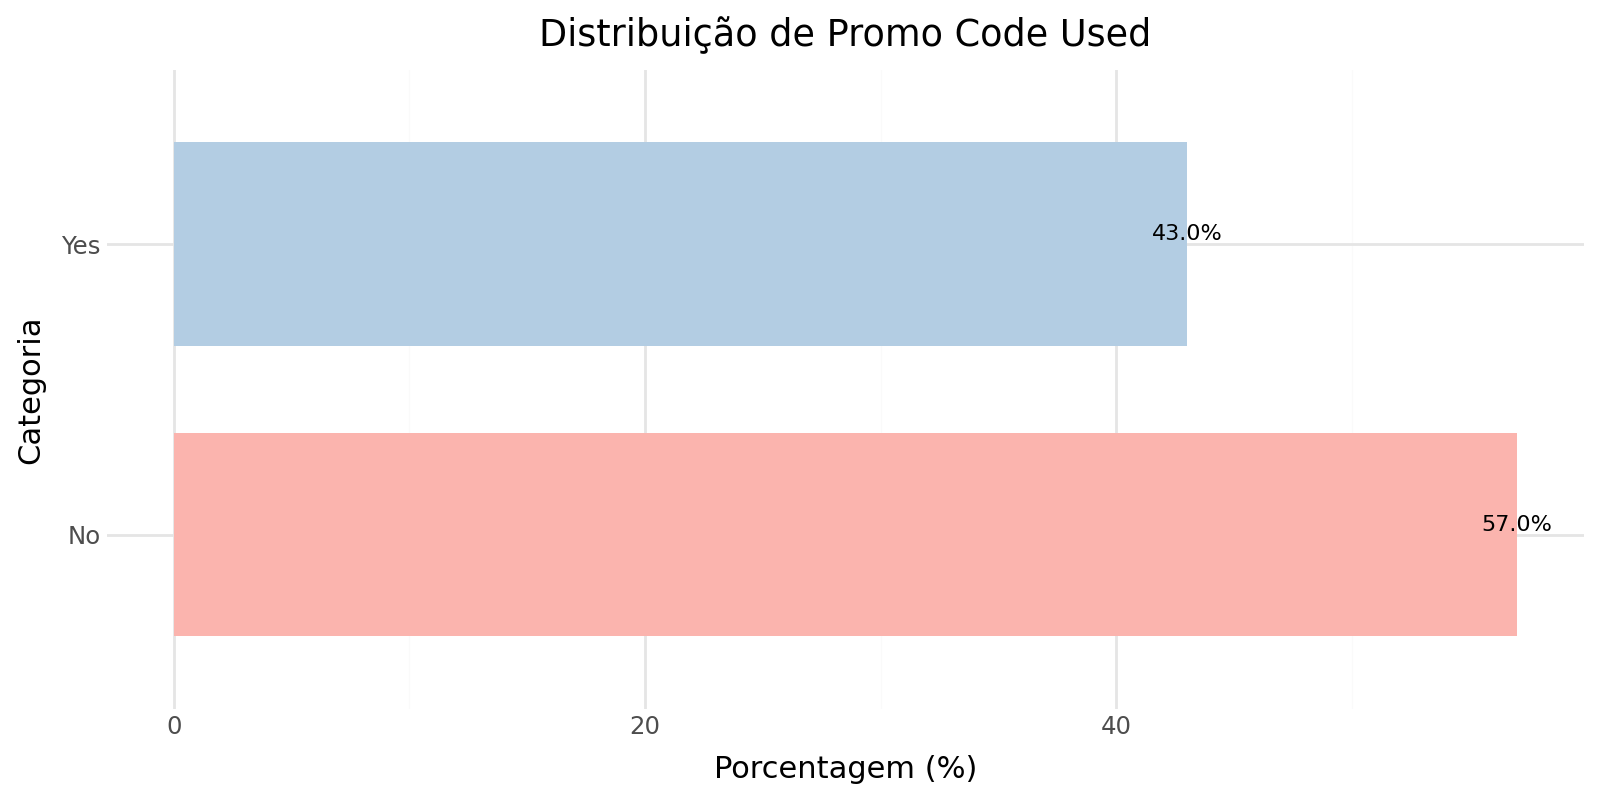

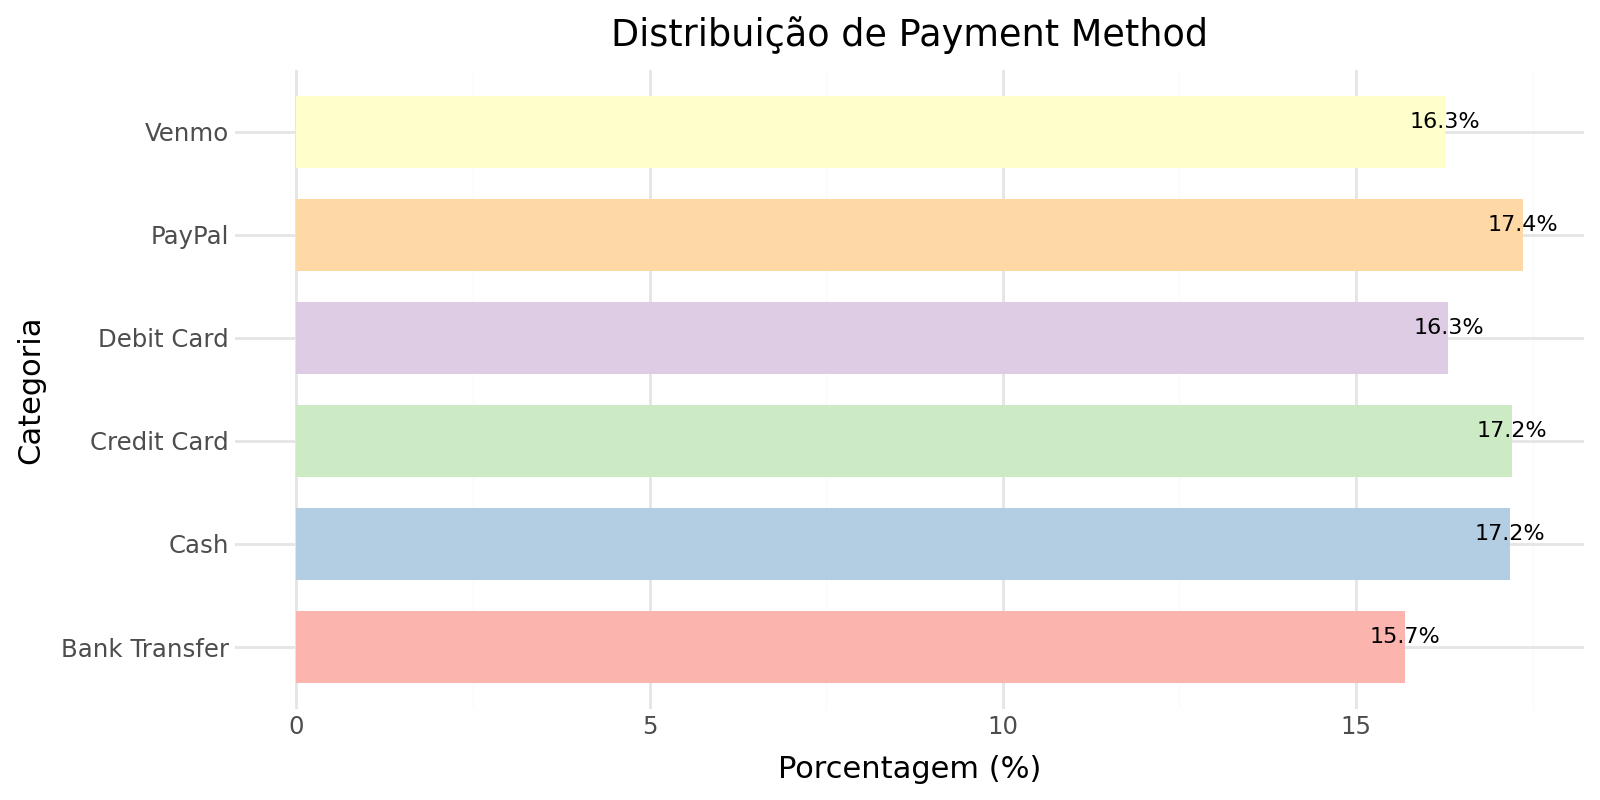

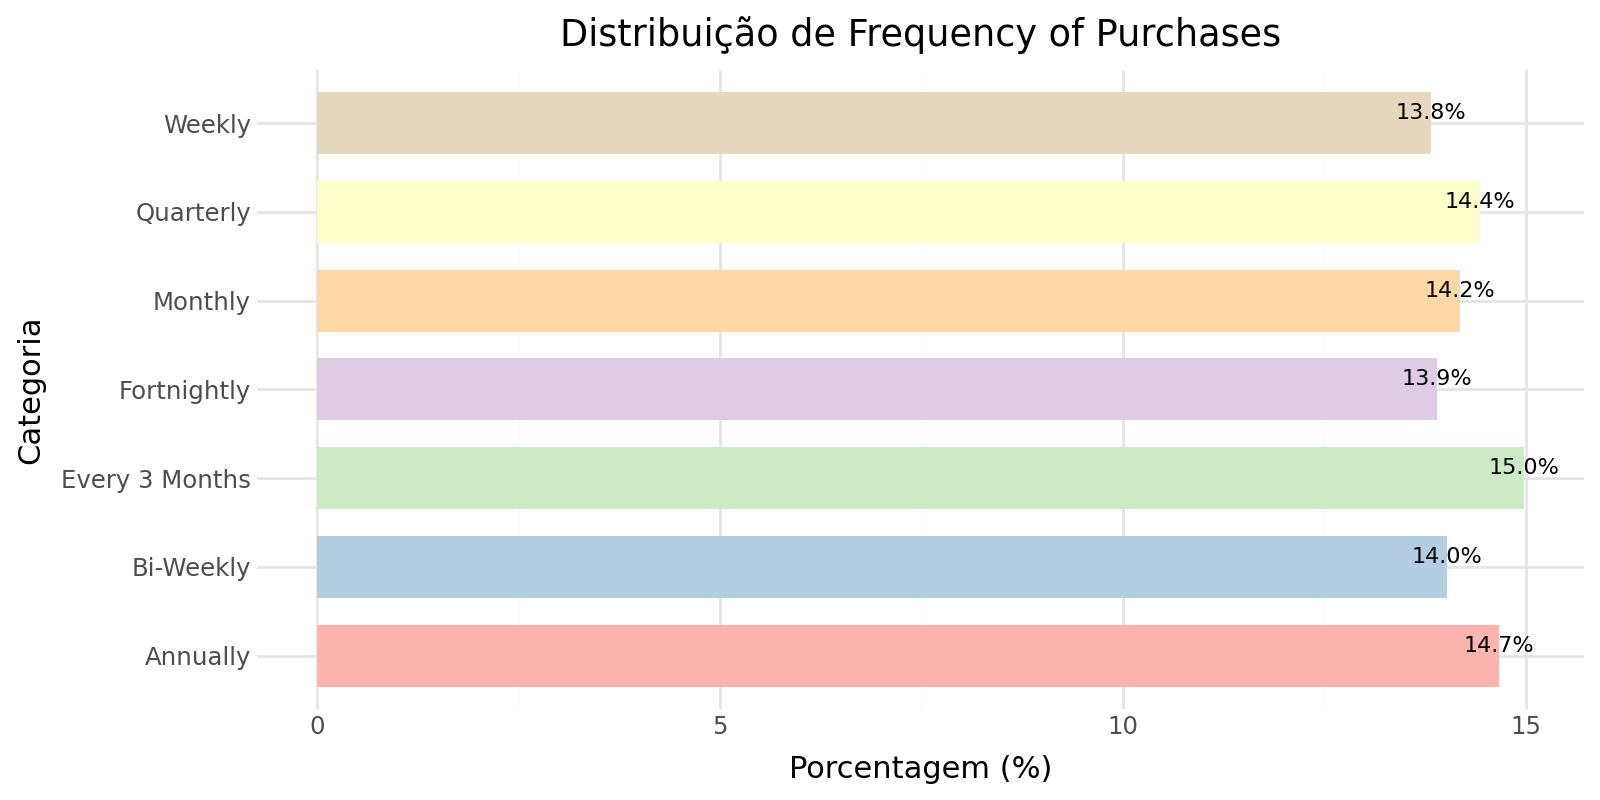

In [32]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = [col for col in categorical_cols if col.lower() not in ['customer id', 'id', 'customerid']]

cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]

from plotnine import options
options.figure_size = (8, 4)

for col in cols_to_plot:
    counts = df[col].value_counts(normalize=True).reset_index()
    counts.columns = [col, 'prop']
    counts['prop_percent'] = counts['prop'] * 100
    counts['label'] = counts['prop_percent'].map(lambda x: f'{x:.1f}%')

    p = (
        ggplot(counts, aes(x=col, y='prop_percent', fill=col))
        + geom_bar(stat='identity', show_legend=False, width=0.7)
        + geom_text(aes(label='label'), va='bottom', size=8)
        + coord_flip()
        + scale_fill_brewer(type='qual', palette='Pastel1')
        + theme_minimal()
        + theme(
            figure_size=(8, 4),
        )
        + labs(
            title=f"Distribuição de {col}",
            x="Categoria",
            y="Porcentagem (%)"
        )
    )

    display(p)


As variáveis analisadas são categóricas, ou seja, representam informações qualitativas sobre os clientes e as compras realizadas.  
Cada gráfico mostra a **distribuição percentual** de categorias dentro de cada variável, permitindo compreender o comportamento e as preferências dos consumidores.

---

#### **Gender (Gênero)**
O gráfico mostra que **68% dos clientes são homens** e **32% são mulheres**.  
Essa diferença sugere que o público da base de dados é predominantemente masculino, o que pode direcionar ações de marketing e comunicação voltadas a esse grupo, ou incentivar campanhas para atrair mais clientes do gênero feminino.

---

#### **Category (Categoria de Produto)**
A categoria **Clothing (Roupas)** representa **44,5%** das compras, seguida por **Accessories (Acessórios)** com **31,8%**, **Footwear (Calçados)** com **15,4%**, e **Outerwear (Casacos)** com **8,3%**.  
Isso indica que os produtos de vestuário e acessórios são os mais populares, representando juntos mais de 75% das compras — um indício claro de que a base de clientes tem forte foco em moda e estilo.

---

#### **Size (Tamanho do Produto)**
O tamanho **M** é o mais vendido (**45%**), seguido de **L (27%)**, **S (17%)** e **XL (11%)**.  
Esses resultados mostram uma **maior demanda por tamanhos médios e grandes**, algo importante para o planejamento de estoque e estratégias de precificação.

---

#### **Season (Estação do Ano)**
As vendas estão **bem distribuídas entre as quatro estações**, variando de **24,5% a 25,6%**, com leve destaque para a primavera (**25,6%**).  
Isso sugere que não há forte sazonalidade nas compras — o que indica um fluxo de vendas relativamente constante ao longo do ano.

---

#### **Subscription Status (Assinatura Ativa)**
A maioria dos clientes (**73%**) **não possui assinatura ativa**, enquanto **27%** têm.  
Esse dado mostra **oportunidade para crescimento de assinaturas**, com potencial para estratégias de fidelização e programas de benefícios.

---

#### **Shipping Type (Tipo de Entrega)**
Os métodos de entrega estão bem equilibrados: *Free Shipping* (**17,3%**), *Standard* (**16,8%**), *Express* (**16,6%**), *Next Day Air* (**16,6%**), *Store Pickup* (**16,7%**) e *2-Day Shipping* (**16,1%**).  
Essa distribuição equilibrada mostra que os clientes utilizam **diversas modalidades de envio**, sem uma preferência marcante — o que pode indicar eficiência logística em diferentes opções.

---

#### **Discount Applied e Promo Code Used**
Em ambos os casos, **57% das compras não utilizaram desconto ou cupom**, enquanto **43%** fizeram uso dessas promoções.  
Isso indica que uma parcela considerável dos clientes é **sensível a promoções e incentivos de preço**, mas que a maioria ainda compra sem depender de descontos, o que sugere **boa percepção de valor dos produtos**.

---

#### **Payment Method (Método de Pagamento)**
Os métodos de pagamento estão **bem distribuídos**, com destaque para *PayPal (17,4%)*, *Credit Card (17,2%)* e *Cash (17,2%)*.  
Os demais — *Debit Card (16,3%)*, *Venmo (16,3%)* e *Bank Transfer (15,7%)* — também têm representatividade similar.  

---

#### **Frequency of Purchases (Frequência de Compras)**
As frequências de compra estão distribuídas de forma equilibrada, com valores entre **13,8% e 15,0%** para categorias como *Weekly*, *Monthly*, *Quarterly* e *Annually*.  
Isso mostra que há **clientes de diferentes perfis de compra**, desde os mais recorrentes até os ocasionais.  
A ausência de concentração forte em uma categoria indica **base de clientes variada e heterogênea**.

---

### **Síntese Geral**
A análise das variáveis categóricas revela que:
- O público é majoritariamente masculino (68%).  
- O foco principal está em produtos de vestuário e acessórios.  
- Há demanda predominante por tamanhos médios e grandes.  
- As vendas são constantes ao longo do ano, sem grande variação sazonal.  
- Existe potencial de crescimento no programa de assinaturas.  
- E há equilíbrio tanto nos métodos de pagamento quanto nas modalidades de envio.

Essas informações são essenciais para entender o comportamento do consumidor e embasar estratégias de marketing, estoque e fidelização.


In [33]:
# Distribuição das variáveis (hist, boxplot, describe())
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols].describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Analisando variável: Age



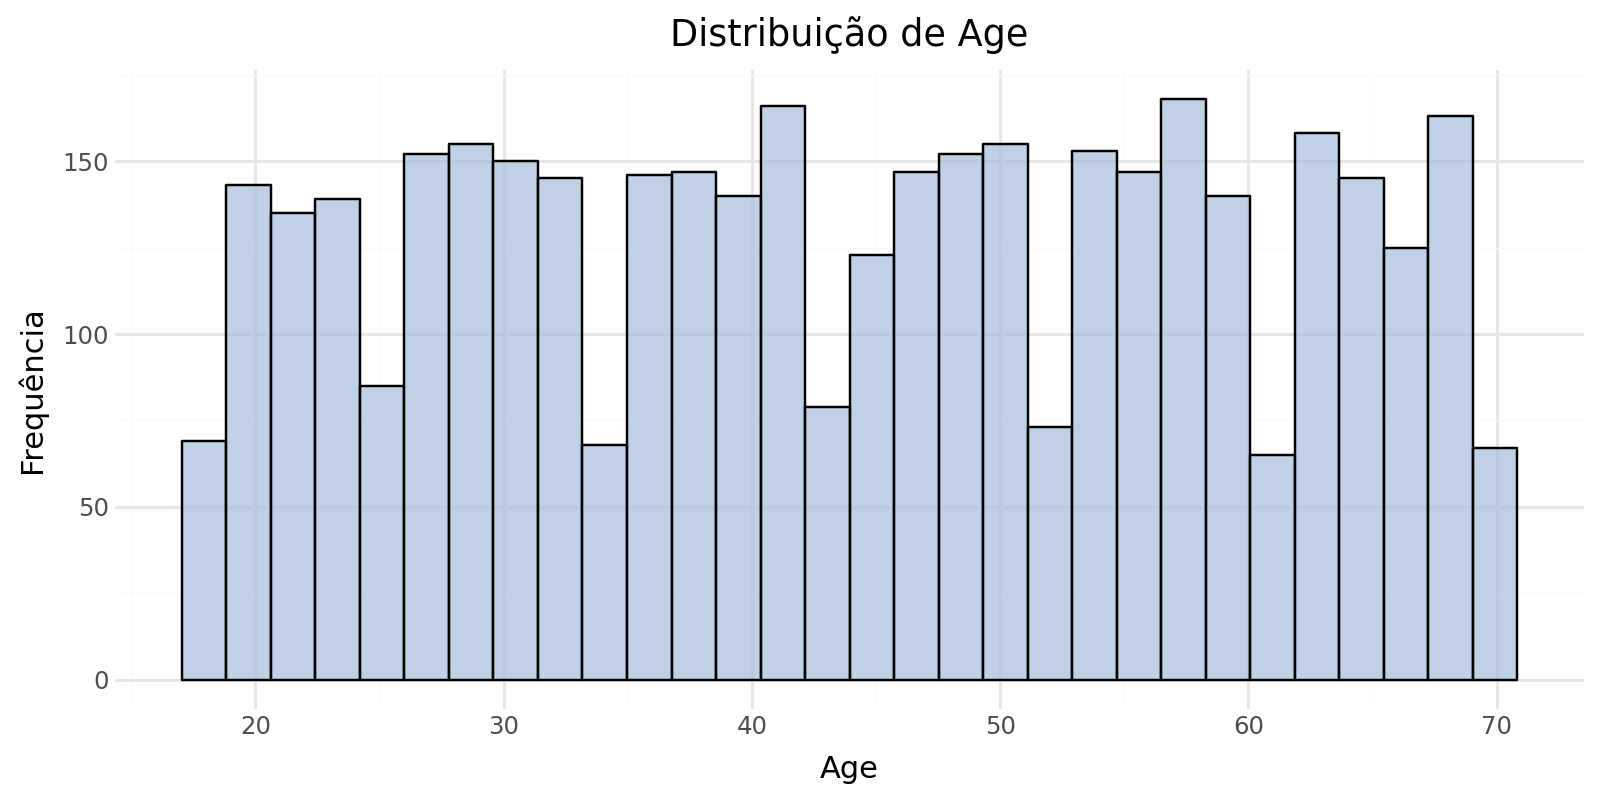

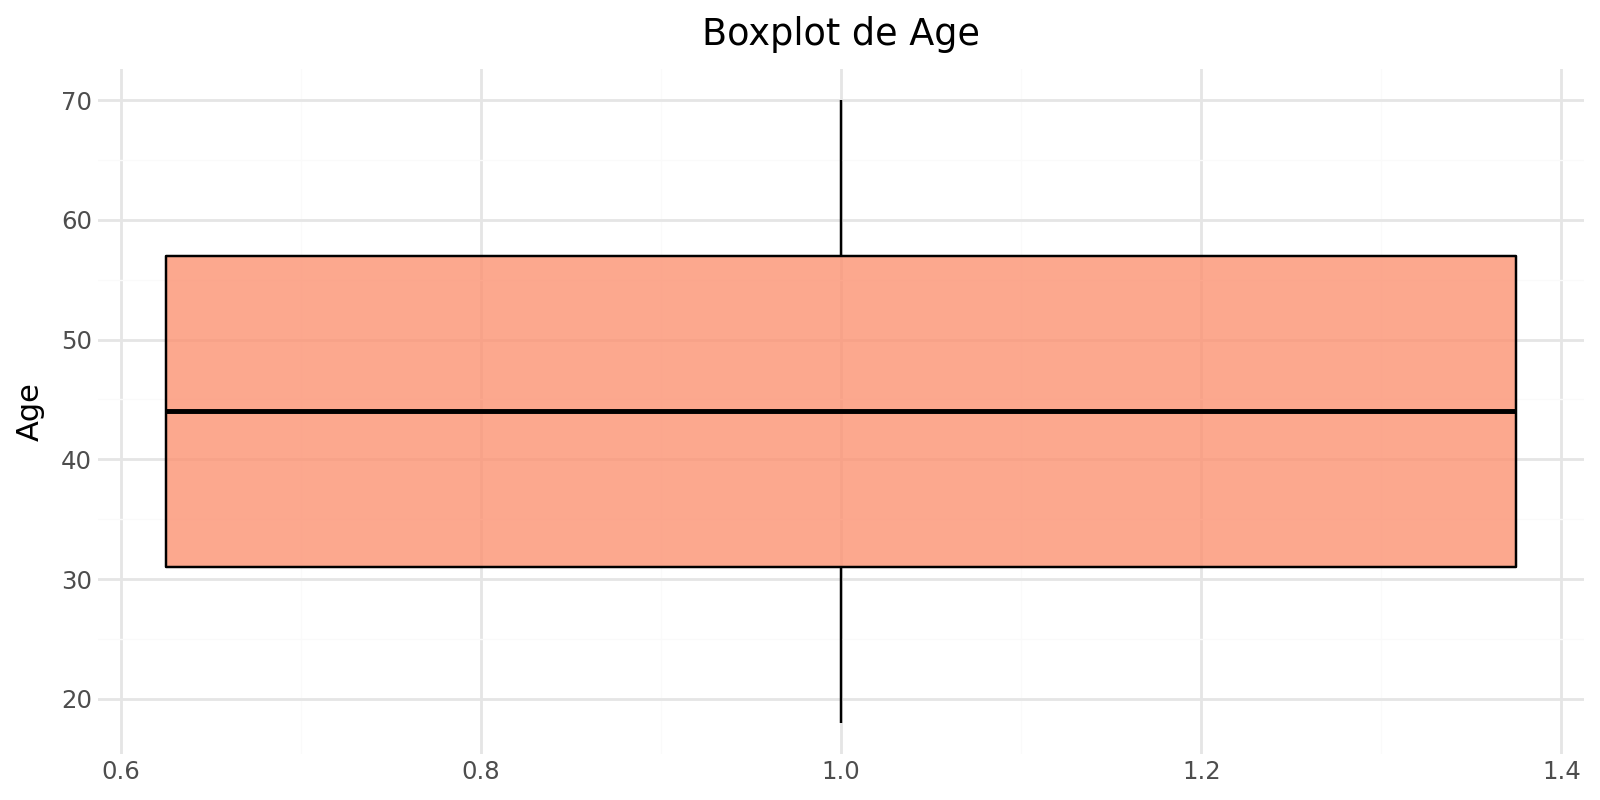

Analisando variável: Purchase Amount (USD)



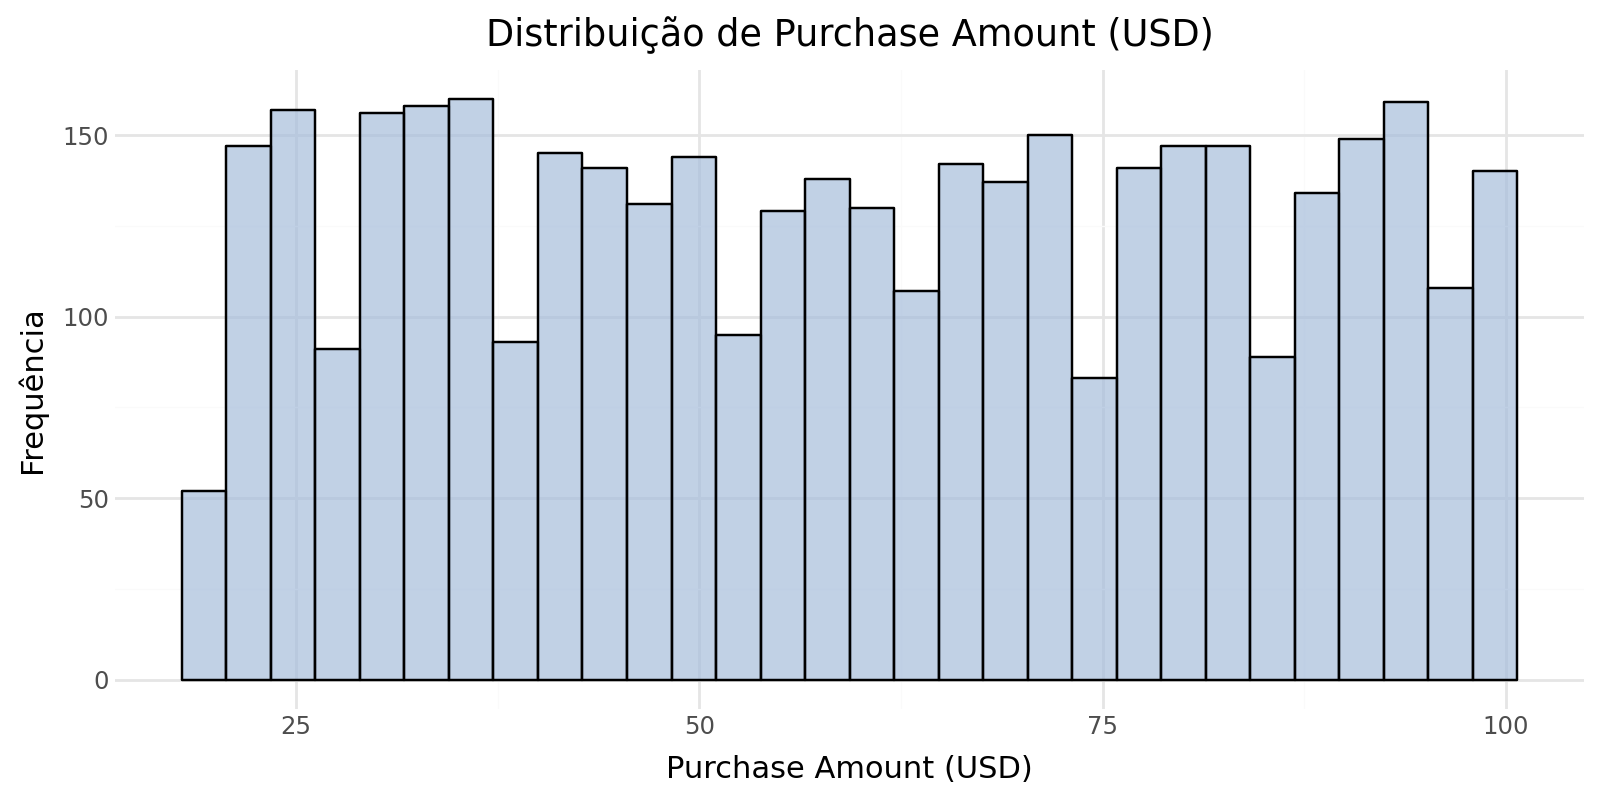

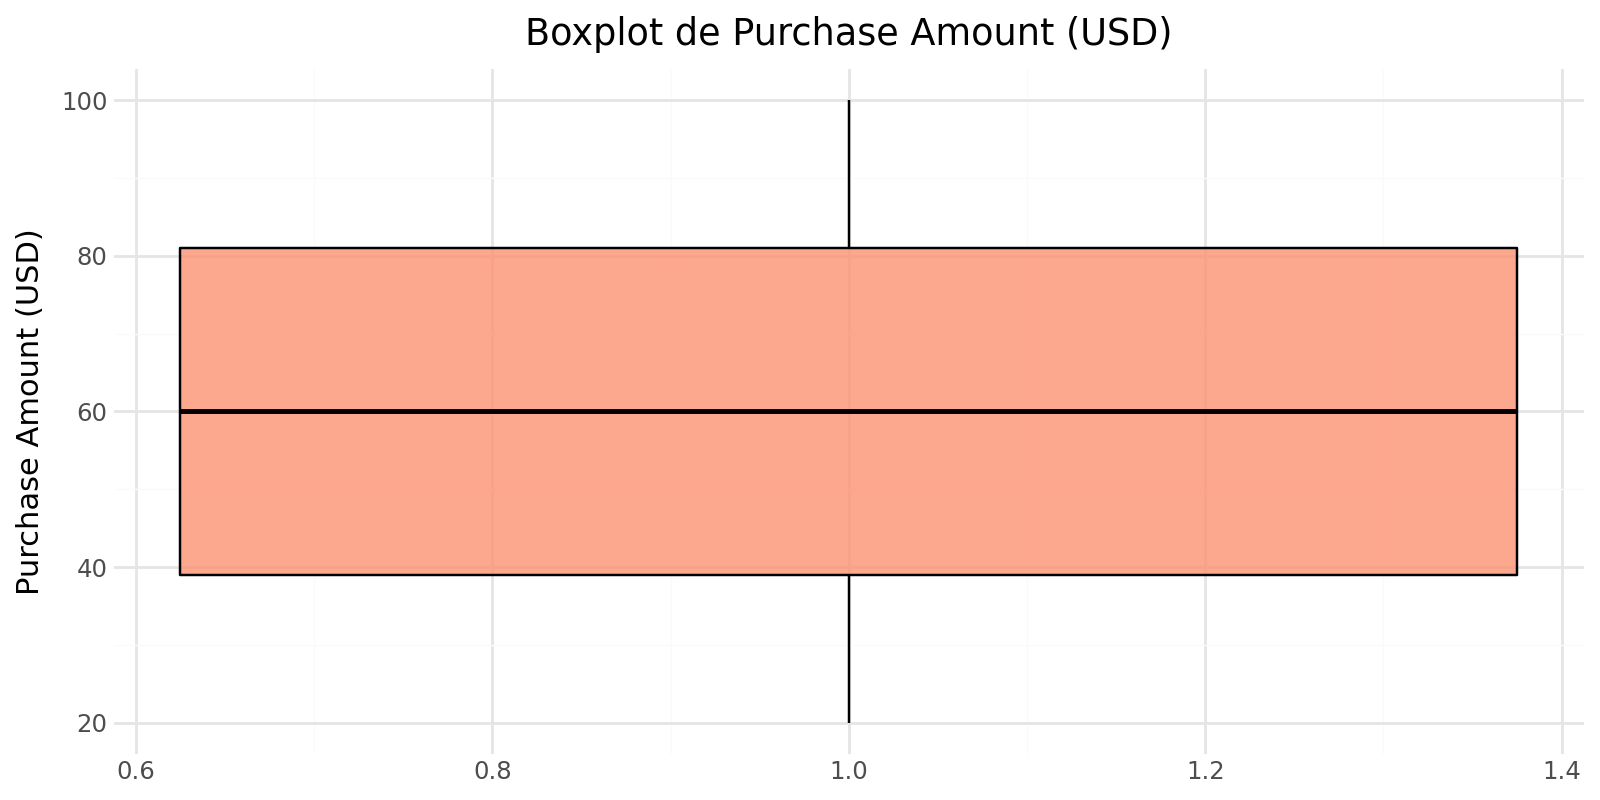

Analisando variável: Review Rating



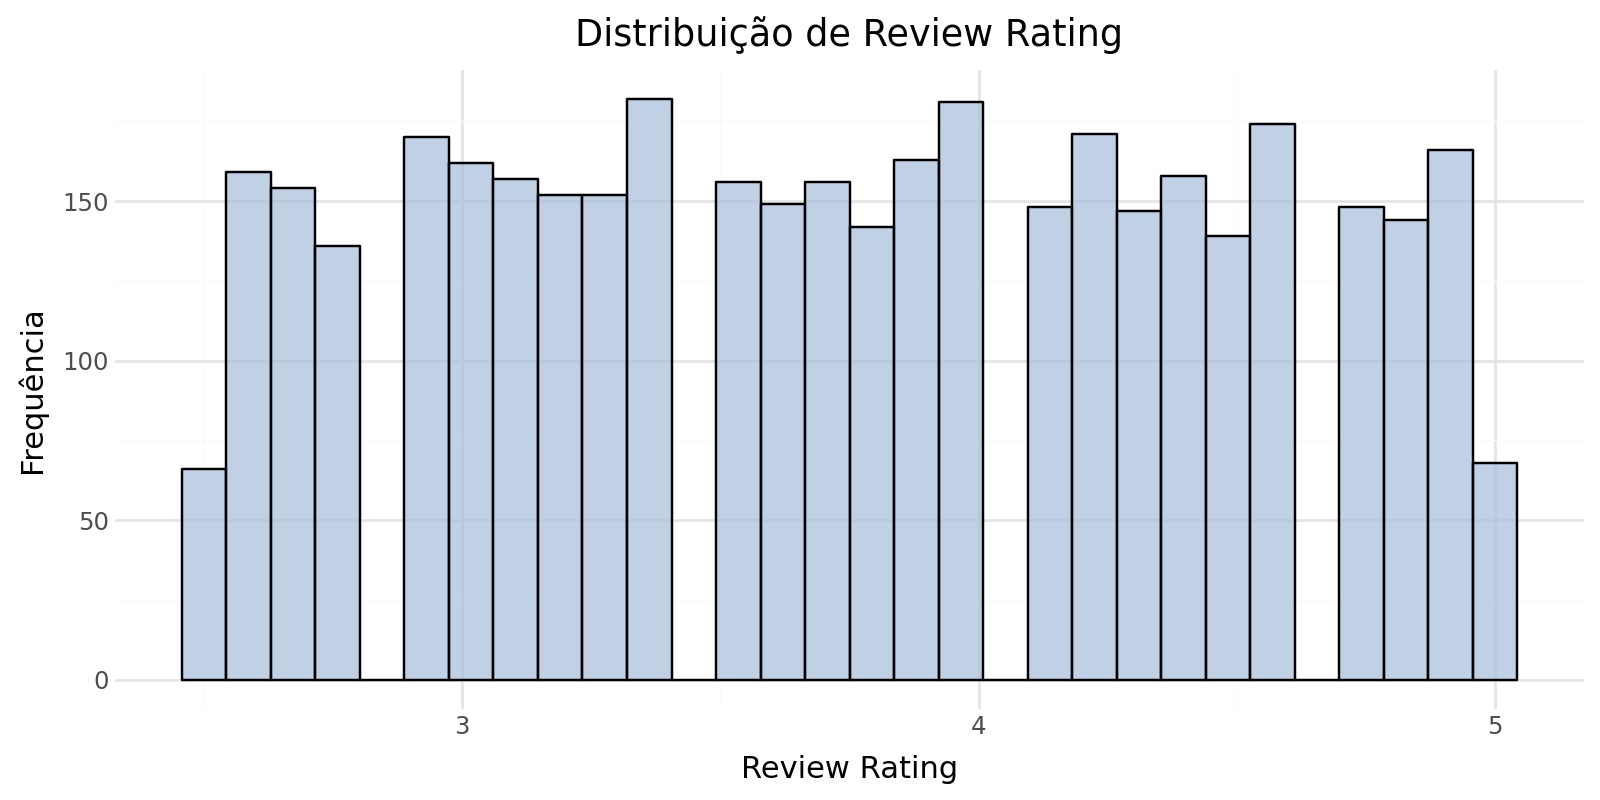

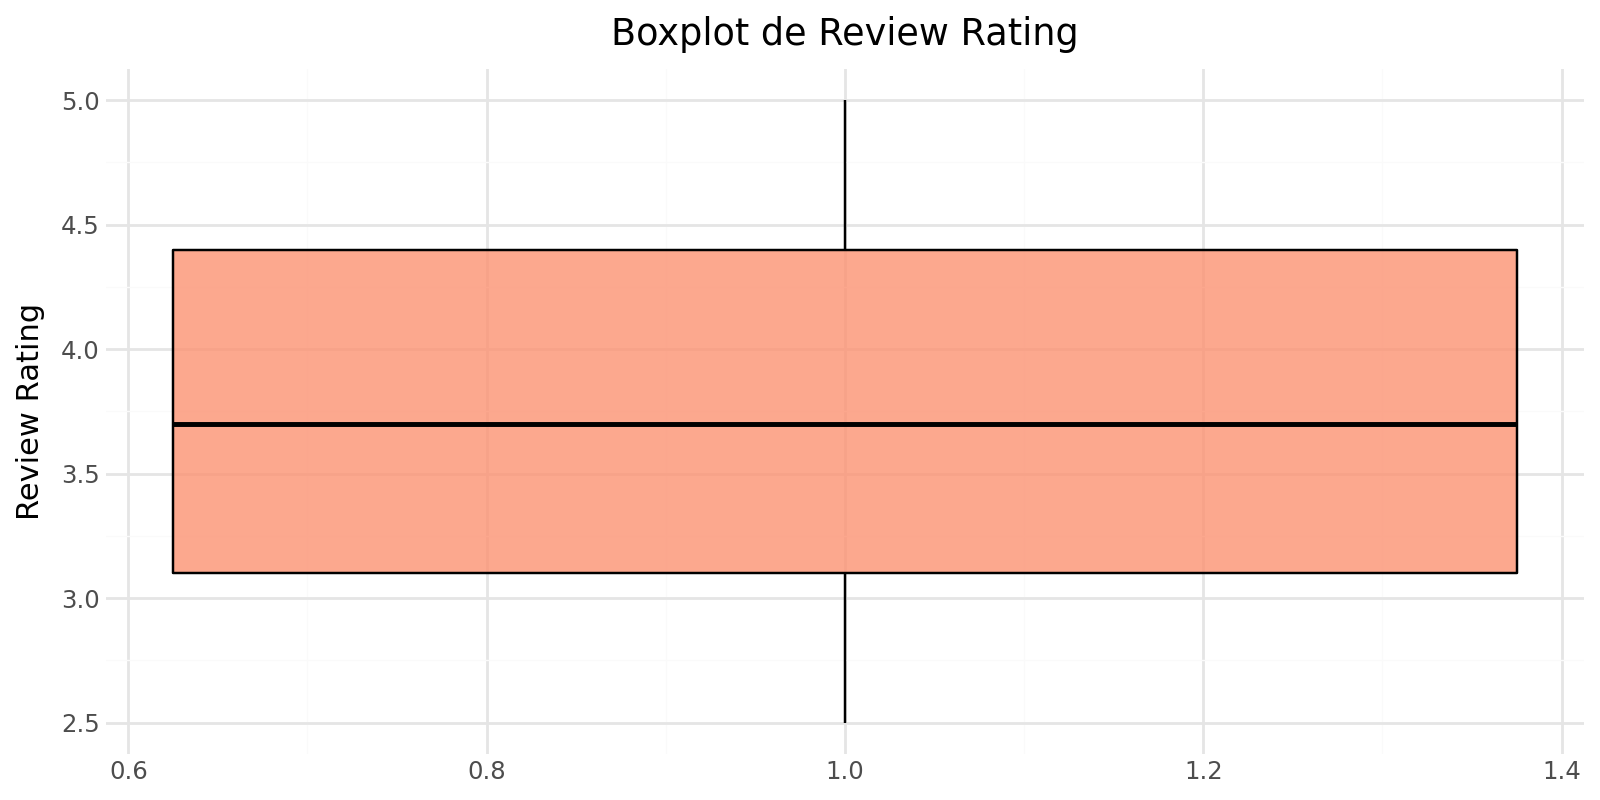

Analisando variável: Previous Purchases



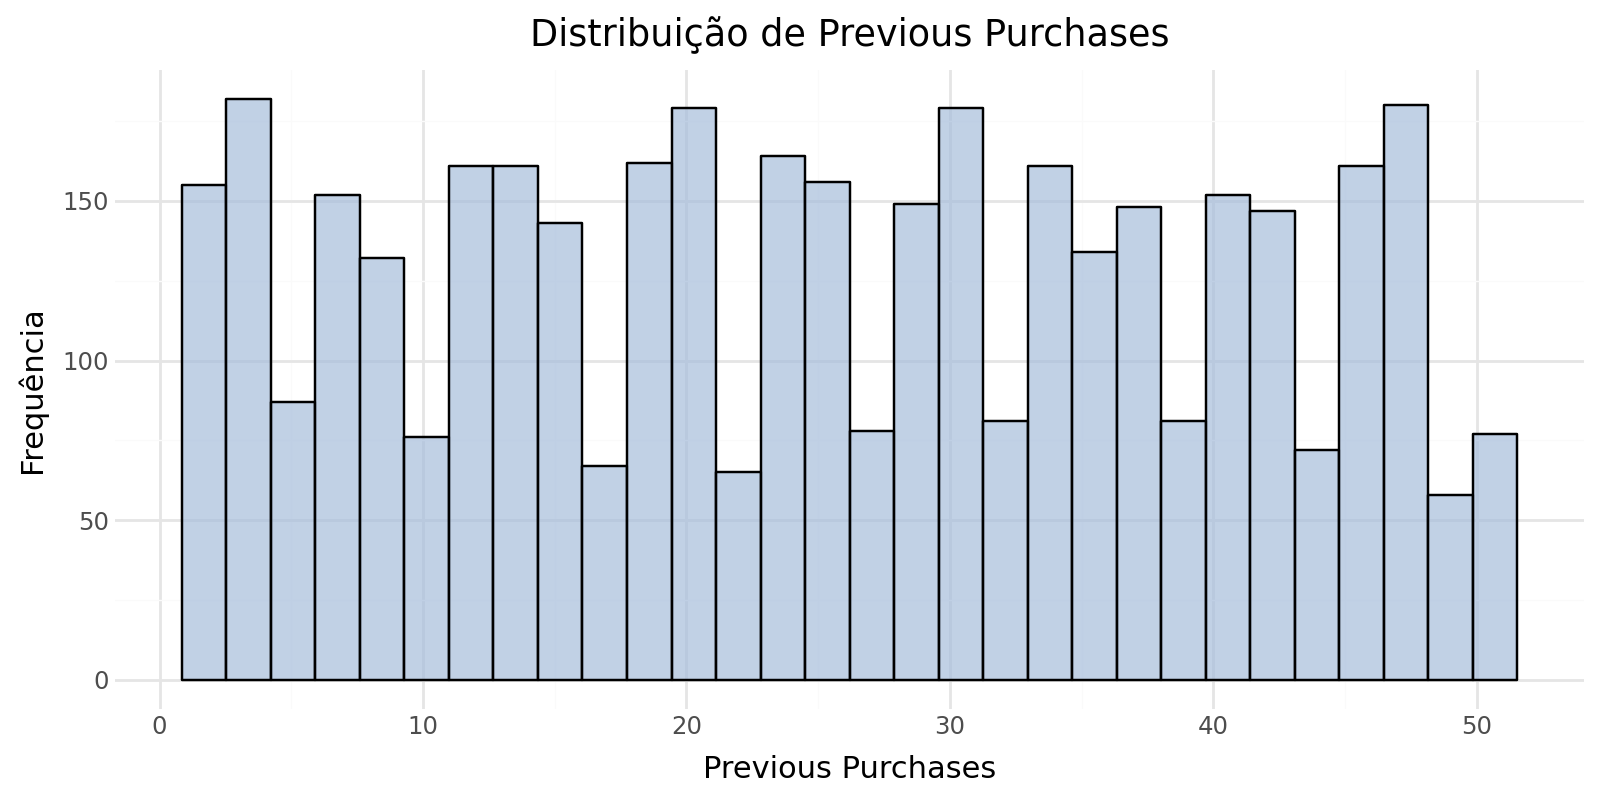

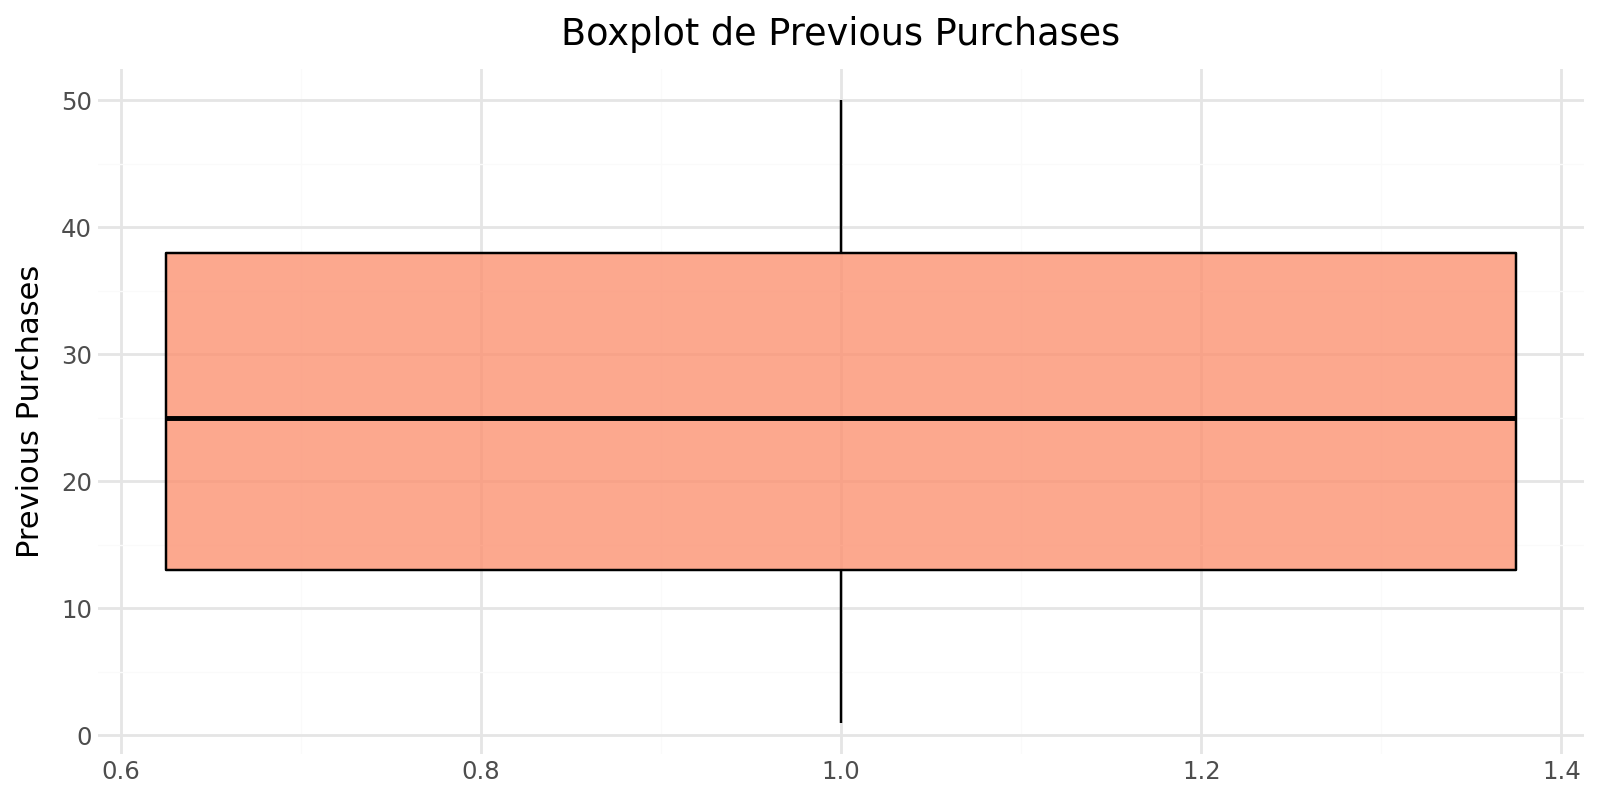

In [34]:
numerical_cols = [col for col in df.select_dtypes(include=['number']).columns if 'customer' not in col.lower()]

for col in numerical_cols:
    print(f"Analisando variável: {col}\n")

    hist = (
        ggplot(df, aes(x=col))
        + geom_histogram(bins=30, fill="#a6bddb", color="black", alpha=0.7)
        + theme_minimal()
        + labs(title=f"Distribuição de {col}", x=col, y="Frequência")
    )

    box = (
        ggplot(df, aes(x=1, y=col))
        + geom_boxplot(fill="#fc9272", color="black", alpha=0.8)
        + theme_minimal()
        + labs(title=f"Boxplot de {col}", x="", y=col)
    )

    display(hist)
    display(box)


Com base na análise realizada, é possível observar que os dados apresentam características adequadas para serem utilizados em processos de clusterização. Caso todos os valores estivessem excessivamente concentrados ou demasiadamente dispersos, isso poderia comprometer a performance dos modelos que aplicaremos na etapa de agrupamento. Dessa forma, é viável prosseguir com o procedimento de clusterização para investigar posteriormente o comportamento de cada cluster e entender os fatores que contribuem para essas diferenças.

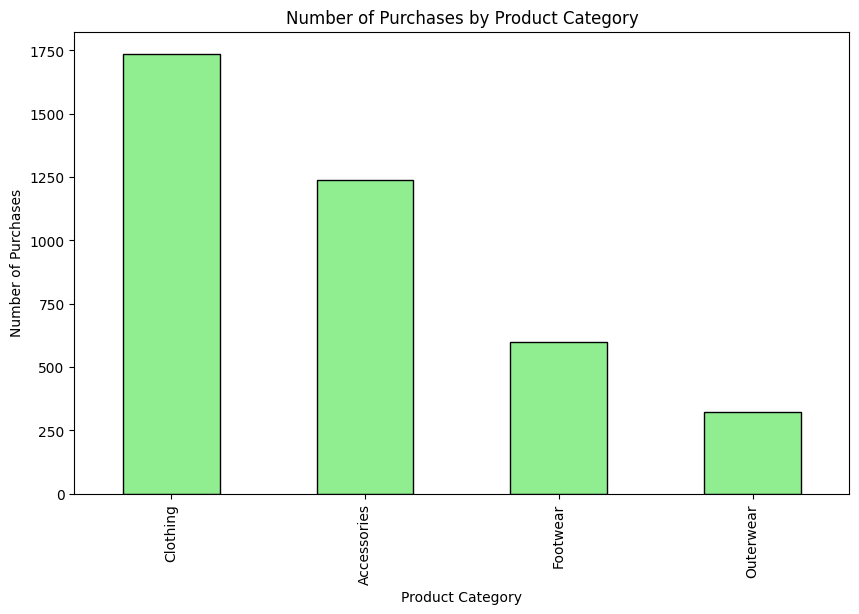

In [ ]:
# Frequência de compras por categoria
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

p = (
    ggplot(category_counts, aes(x='Category', y='Count', fill='Category'))
    + geom_bar(stat='identity', color='black', alpha=0.8, width=0.7)
    + geom_text(aes(label='Count'), va='bottom', size=10, fontweight='bold', nudge_y=20)
    + scale_fill_brewer(type='qual', palette='Set2')
    + theme_minimal()
    + theme(
        figure_size=(10, 6),
        plot_title=element_text(size=14, weight='bold', ha='center'),
        axis_title=element_text(size=11, weight='bold'),
        axis_text_x=element_text(rotation=0, hjust=0.5),
        legend_position='none'
    )
    + labs(
        title='Número de Compras por Categoria de Produto',
        x='Categoria de Produto',
        y='Número de Compras'
    )
)

display(p)


<a id="prep"></a>

## 3) Limpeza e Pré-processamento

- **Numéricas**: padronização com `StandardScaler`  
- **Categóricas**: one-hot encoding (`OneHotEncoder(handle_unknown="ignore")`)

> Esta etapa evita que a escala de variáveis distorça as distâncias no K-Means e nas projeções.


In [36]:
# Tratamento de valores ausentes
missing_summary = df.isnull().sum()
print("Missing Values Summary:")
print(missing_summary[missing_summary > 0])


Missing Values Summary:
Series([], dtype: int64)


In [37]:
# Codificação categórica (OneHotEncoder)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = ohe.fit_transform(df[categorical_cols])

In [38]:
# Escalonamento (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data = scaler.fit_transform(df[numerical_cols])


# Dataset final

In [39]:
df_final = pd.concat(
    [pd.DataFrame(numerical_data, columns=numerical_cols),
        pd.DataFrame(categorical_data, columns=ohe.get_feature_names_out(categorical_cols))],
    axis=1
)
df_final = pd.DataFrame(df_final)
df_final.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,...,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.718913,-0.285629,-0.907584,-0.785831,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.648629,0.178852,-0.907584,-1.616552,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.390088,0.558882,-0.907584,-0.162789,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.517099,1.276716,-0.349027,1.637107,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.061263,-0.454531,-1.466141,0.391025,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelagem (K-Means, MDS, t-SNE)

Determinação do Número Ótimo de Clusters (k)

Escolher o valor correto de **k** (número de clusters) é crucial para uma boa segmentação. Vamos usar **2 métricas complementares**:

### Métricas Utilizadas

**1. Elbow Method (Método do Cotovelo)**
- Avalia a **inércia** (soma das distâncias quadradas dentro dos clusters)
- Quanto menor, melhor
- Procuramos o "cotovelo" na curva (ponto onde a redução desacelera)

**2. Silhouette Score**  *Principal métrica*
- Mede quão bem cada ponto está dentro do seu cluster vs. outros clusters
- **Valores**: -1 (péssimo) a +1 (perfeito)
- **Interpretação**:
  - > 0.7: estrutura forte
  - 0.5-0.7: estrutura razoável
  - 0.25-0.5: estrutura fraca
  - < 0.25: sem estrutura clara
- >  **Estratégia**: Usaremos essas métricas como guia, mas priorizaremos **interpretabilidade** (3-5 clusters são mais acionáveis para negócio)

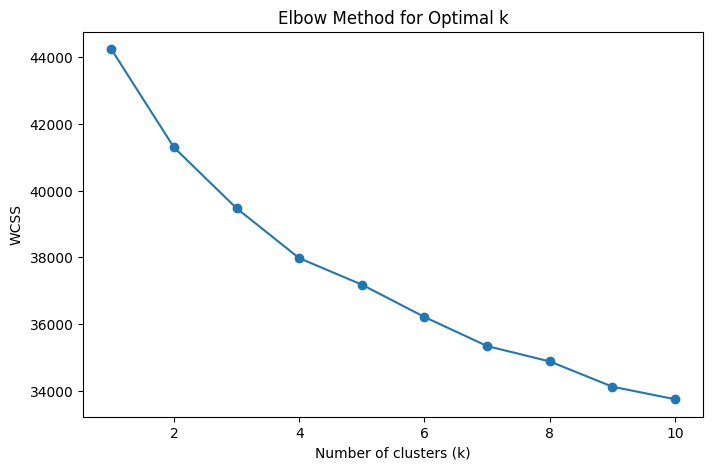

In [40]:
# Determinação de k ótimo usando o método do cotovelo
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


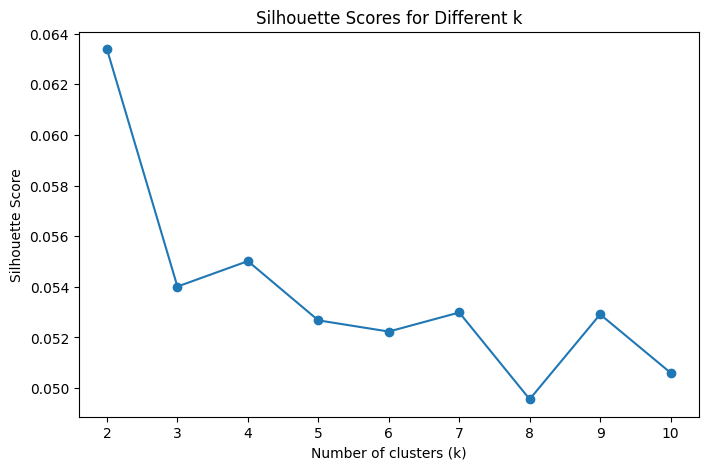

In [41]:
# metodo da silhueta
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_final)
    silhouette_avg = silhouette_score(df_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

**Escalonamento Multidimensional (MDS)**

O *Multidimensional Scaling* (MDS) é uma técnica de redução de dimensionalidade voltada para representar dados de alta dimensão em espaços menores (geralmente 2D ou 3D), preservando as distâncias ou similaridades originais entre os pontos.

MDS prioriza manter as relações de distância relativas. O método inicia com o cálculo de uma matriz de distâncias e utiliza uma função de custo chamada *stress* para avaliar a discrepância entre as distâncias originais e as do espaço reduzido. Um processo iterativo de otimização ajusta as posições dos pontos até que o *stress* seja minimizado, resultando em uma representação visual que reflete com precisão as relações espaciais dos dados originais.


c:\Users\hudso\Desktop\aps-ecommerce-clustering\env\lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.


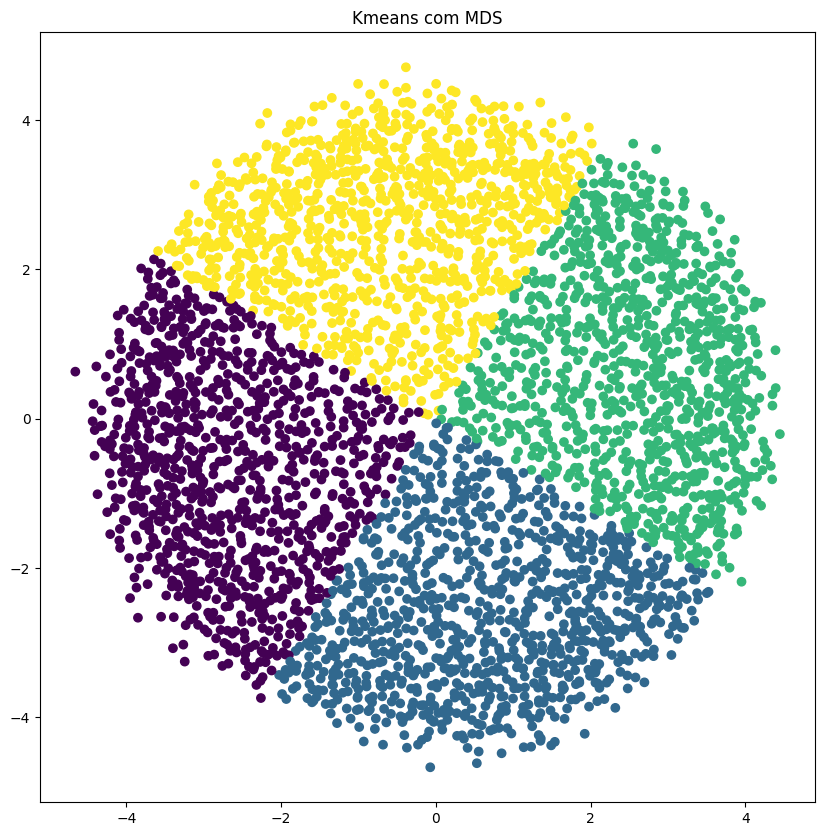

In [ ]:
# Clusterização com MDS
from sklearn.cluster import KMeans
from plotnine import ggplot, aes, geom_point, labs, theme_minimal, theme, element_text, scale_color_gradientn


n_cluster = 4
mds = MDS(n_components=2, random_state=42)

# Aplique o K-means aos dados normalizados
kmeans = KMeans(n_clusters=n_cluster, random_state=42)

X = df_final


# fit_transform
X_mds = mds.fit_transform(X)

# fit
kmeans.fit(X_mds)

# predict
y_pred = kmeans.predict(X_mds)

# plotar o gráfico

# Criar DataFrame para plotar
mds_df = pd.DataFrame({
    'MDS1': X_mds[:, 0],
    'MDS2': X_mds[:, 1],
    'Cluster': y_pred.astype(str)
})

# Definir cores dos clusters
cluster_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

p = (
    ggplot(mds_df, aes(x='MDS1', y='MDS2', color='Cluster'))
    + geom_point(size=2, alpha=0.6)
    + scale_color_manual(values=cluster_colors)
    + labs(
        title='K-means com MDS',
        x='Componente MDS 1',
        y='Componente MDS 2'
    )
    + theme_minimal()
    + theme(
        figure_size=(10, 10),
        plot_title=element_text(size=16, weight='bold', ha='center'),
        axis_title=element_text(size=12, weight='bold'),
        legend_title=element_text(size=11, weight='bold'),
        legend_position='right'
    )
)

display(p)


**t-SNE**

O *t-Distributed Stochastic Neighbor Embedding* (t-SNE) é uma técnica de redução de dimensionalidade não linear amplamente utilizada para visualizar dados de alta dimensão em espaços bidimensionais ou tridimensionais.

O algoritmo transforma as relações de similaridade entre pontos em probabilidades, tanto no espaço original quanto no reduzido, e busca preservar as relações locais dos dados. No espaço original, as similaridades são medidas por uma distribuição Gaussiana, enquanto no espaço reduzido é utilizada a distribuição *t* de Student. A diferença entre essas distribuições é minimizada por meio da divergência de Kullback-Leibler.

Essa abordagem permite representar de forma mais fiel a estrutura dos agrupamentos (clusters) e mitiga o problema de *crowding*, evitando que pontos moderadamente distantes se amontoem. O resultado é uma visualização que evidencia padrões e relações complexas entre os dados.


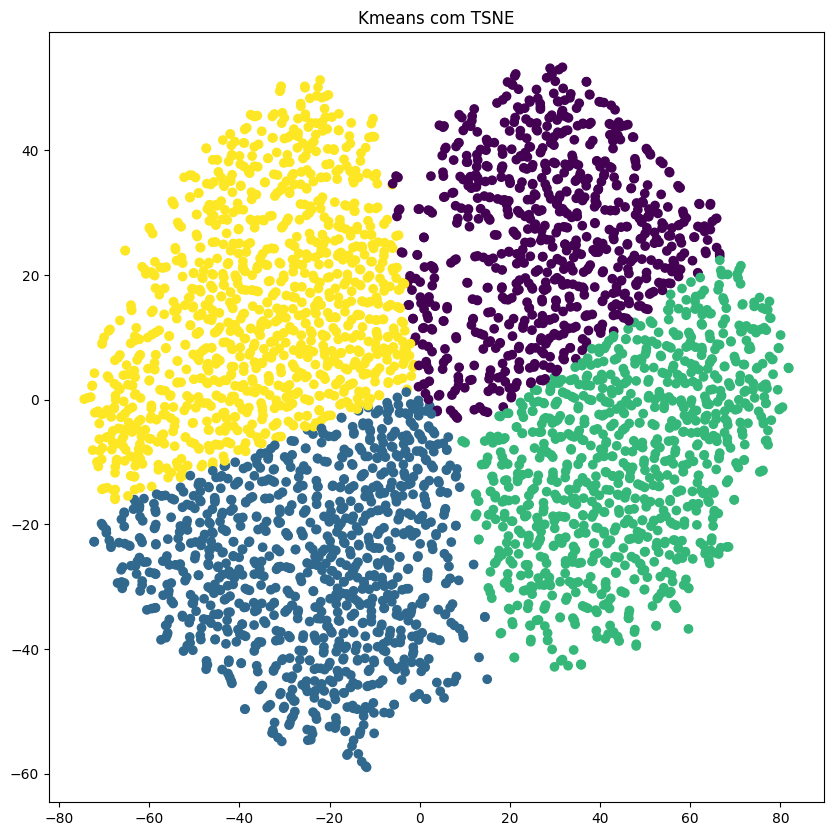

In [ ]:
# TSNE + KMeans
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_mds = tsne.fit_transform(X)
kmeans.fit(X_mds)
y_pred = kmeans.predict(X_mds)



# TSNE + KMeans com plotnine
from sklearn.manifold import TSNE
from plotnine import ggplot, aes, geom_point, labs, theme_minimal, theme, element_text, scale_color_manual

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
kmeans.fit(X_tsne)
y_pred = kmeans.predict(X_tsne)

# Criar DataFrame para plotar
tsne_df = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'Cluster': y_pred.astype(str)
})

# Definir cores dos clusters (mesmas do MDS)
cluster_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

p = (
    ggplot(tsne_df, aes(x='TSNE1', y='TSNE2', color='Cluster'))
    + geom_point(size=2, alpha=0.6)
    + scale_color_manual(values=cluster_colors)
    + labs(
        title='K-means com t-SNE',
        x='Componente t-SNE 1',
        y='Componente t-SNE 2'
    )
    + theme_minimal()
    + theme(
        figure_size=(10, 10),
        plot_title=element_text(size=16, weight='bold', ha='center'),
        axis_title=element_text(size=12, weight='bold'),
        legend_title=element_text(size=11, weight='bold'),
        legend_position='right'
    )
)

display(p)



## Por que a separação não está tão boa?

### Problemas Identificados:

1. **Baixo Silhouette Score (~0.15-0.25)**
   - Indica que os clusters não estão bem separados
   - Muitos pontos estão próximos da fronteira entre clusters
   - Estrutura de agrupamento fraca nos dados

2. **Distribuição Equilibrada Demais**
   - As variáveis categóricas mostram distribuições muito uniformes (±15-25%)
   - Não há padrões fortemente diferenciados no comportamento de compra
   - Os clientes são relativamente homogêneos

3. **Alta Dimensionalidade**
   - Após one-hot encoding, temos muitas features binárias
   - K-Means sofre com "maldição da dimensionalidade"
   - MDS e t-SNE comprimem muita informação em 2D, perdendo nuances

4. **Natureza dos Dados**
   - Dataset parece ser sintético/balanceado artificialmente
   - Falta variabilidade real no comportamento dos consumidores
   - Variáveis numéricas com distribuições regulares


# Interpretação dos Clusters (Personas)

In [48]:
# Perfil médio dos grupos
df['Cluster'] = y_pred
df.groupby('Cluster')[numerical_cols].mean()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Cluster,,,,
0,47.281525,76.097752,4.211144,34.810362
1,31.730473,68.161716,4.134543,15.471947
2,40.497404,44.870197,3.300415,15.338525
3,55.379104,49.814925,3.363383,34.253731


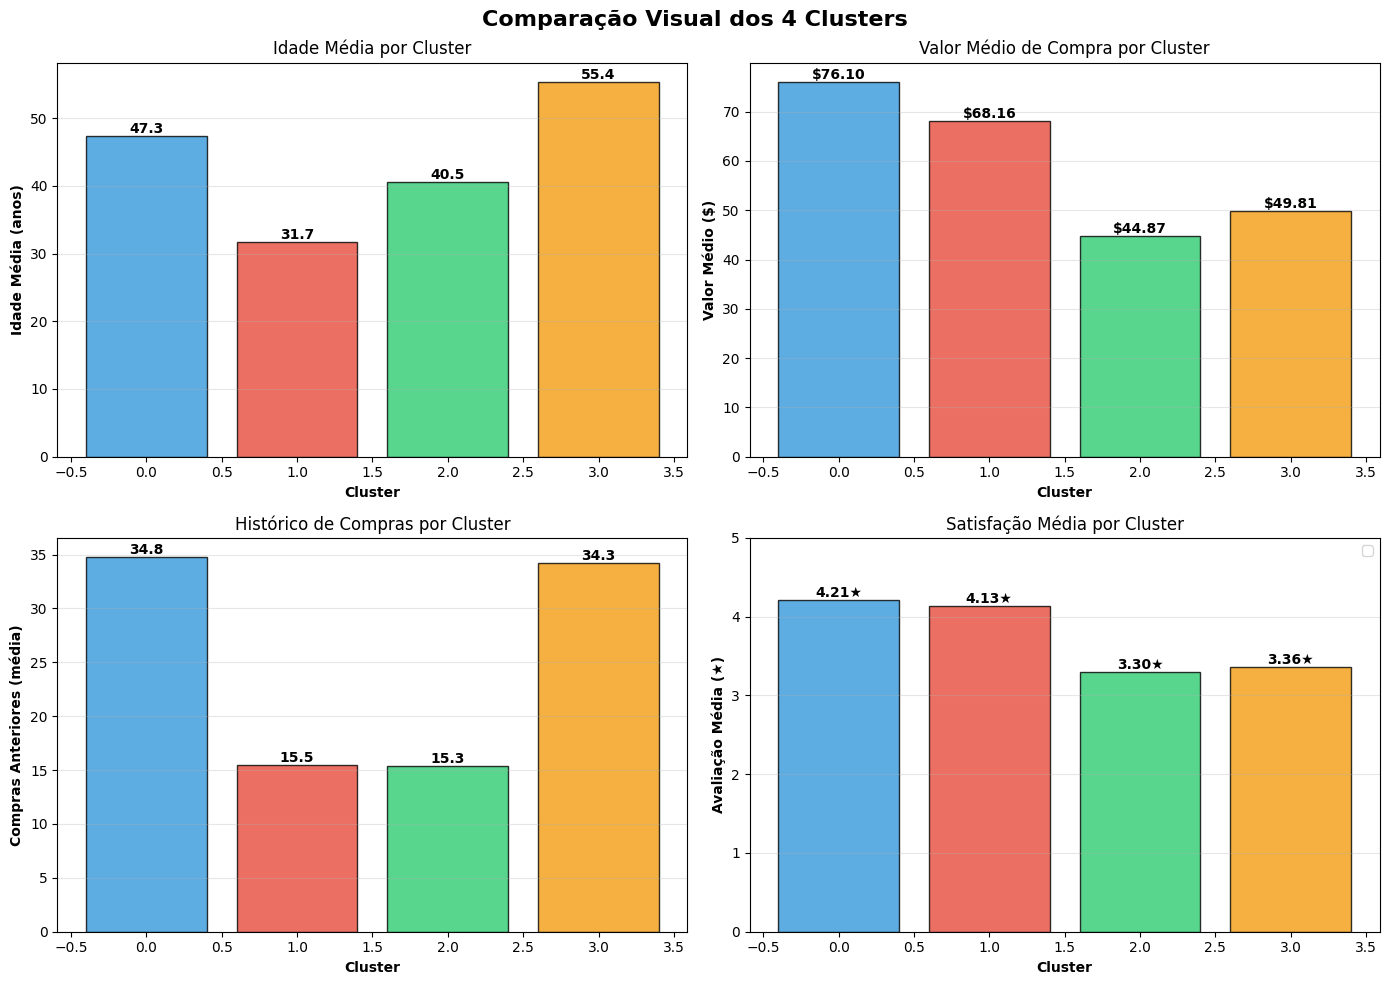


LEGENDA DOS CLUSTERS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Cluster 0: Compradores Maduros e Engajados (26.2%)
Cluster 1: Jovens Gastadores (23.3%)
Cluster 2: Compradores Casuais e Econômicos (24.7%)
Cluster 3: Maduros Conservadores (25.8%)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


In [ ]:
# Visualização comparativa dos clusters com plotnine
from plotnine import ggplot, aes, geom_bar, geom_text, labs, theme_minimal, theme, element_text, scale_fill_manual
import pandas as pd

# Preparar dados agregados
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Purchase Amount (USD)': 'mean',
    'Previous Purchases': 'mean',
    'Review Rating': 'mean'
}).reset_index()

# Mapear clusters para nomes e cores
cluster_names = {
    0: 'C0: Maduros Engajados',
    1: 'C1: Jovens Gastadores',
    2: 'C2: Casuais Econômicos',
    3: 'C3: Maduros Conservadores'
}
cluster_colors = {
    0: '#3498db',
    1: '#e74c3c',
    2: '#2ecc71',
    3: '#f39c12'
}

cluster_summary['Cluster_Name'] = cluster_summary['Cluster'].map(cluster_names)
cluster_summary['Color'] = cluster_summary['Cluster'].map(cluster_colors)

# 1. Idade média por cluster
cluster_summary['Age_Label'] = cluster_summary['Age'].apply(lambda x: f'{x:.1f}')
p1 = (
    ggplot(cluster_summary, aes(x='factor(Cluster)', y='Age', fill='factor(Cluster)'))
    + geom_bar(stat='identity', alpha=0.8, color='black', width=0.7)
    + geom_text(aes(label='Age_Label'), va='bottom', size=10, fontweight='bold', nudge_y=1)
    + scale_fill_manual(values=list(cluster_colors.values()))
    + labs(title='Idade Média por Cluster', x='Cluster', y='Idade Média (anos)')
    + theme_minimal()
    + theme(
        figure_size=(7, 5),
        plot_title=element_text(size=14, weight='bold', ha='center'),
        axis_title=element_text(size=11, weight='bold'),
        legend_position='none'
    )
)
display(p1)

# 2. Valor médio de compra
cluster_summary['Purchase_Label'] = cluster_summary['Purchase Amount (USD)'].apply(lambda x: f'${x:.2f}')
p2 = (
    ggplot(cluster_summary, aes(x='factor(Cluster)', y='Purchase Amount (USD)', fill='factor(Cluster)'))
    + geom_bar(stat='identity', alpha=0.8, color='black', width=0.7)
    + geom_text(aes(label='Purchase_Label'), va='bottom', size=10, fontweight='bold', nudge_y=2)
    + scale_fill_manual(values=list(cluster_colors.values()))
    + labs(title='Valor Médio de Compra por Cluster', x='Cluster', y='Valor Médio ($)')
    + theme_minimal()
    + theme(
        figure_size=(7, 5),
        plot_title=element_text(size=14, weight='bold', ha='center'),
        axis_title=element_text(size=11, weight='bold'),
        legend_position='none'
    )
)
display(p2)

# 3. Histórico de compras anteriores
cluster_summary['Previous_Label'] = cluster_summary['Previous Purchases'].apply(lambda x: f'{x:.1f}')
p3 = (
    ggplot(cluster_summary, aes(x='factor(Cluster)', y='Previous Purchases', fill='factor(Cluster)'))
    + geom_bar(stat='identity', alpha=0.8, color='black', width=0.7)
    + geom_text(aes(label='Previous_Label'), va='bottom', size=10, fontweight='bold', nudge_y=1)
    + scale_fill_manual(values=list(cluster_colors.values()))
    + labs(title='Histórico de Compras por Cluster', x='Cluster', y='Compras Anteriores (média)')
    + theme_minimal()
    + theme(
        figure_size=(7, 5),
        plot_title=element_text(size=14, weight='bold', ha='center'),
        axis_title=element_text(size=11, weight='bold'),
        legend_position='none'
    )
)
display(p3)

# 4. Avaliação média
cluster_summary['Rating_Label'] = cluster_summary['Review Rating'].apply(lambda x: f'{x:.2f}★')
p4 = (
    ggplot(cluster_summary, aes(x='factor(Cluster)', y='Review Rating', fill='factor(Cluster)'))
    + geom_bar(stat='identity', alpha=0.8, color='black', width=0.7)
    + geom_text(aes(label='Rating_Label'), va='bottom', size=10, fontweight='bold', nudge_y=0.1)
    + scale_fill_manual(values=list(cluster_colors.values()))
    + labs(title='Satisfação Média por Cluster', x='Cluster', y='Avaliação Média (★)')
    + theme_minimal()
    + theme(
        figure_size=(7, 5),
        plot_title=element_text(size=14, weight='bold', ha='center'),
        axis_title=element_text(size=11, weight='bold'),
        legend_position='none'
    )
)
display(p4)

# Adicionar legenda de clusters
print("\nLEGENDA DOS CLUSTERS:")
print("━" * 70)
print("Cluster 0: Compradores Maduros e Engajados (26.2%)")
print("Cluster 1: Jovens Gastadores (23.3%)")
print("Cluster 2: Compradores Casuais e Econômicos (24.7%)")
print("Cluster 3: Maduros Conservadores (25.8%)")
print("━" * 70)

In [57]:
# Análise detalhada dos perfis de cada cluster
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("ANÁLISE DETALHADA DOS 4 CLUSTERS IDENTIFICADOS")
print("="*80)

# 1. Perfil Demográfico e de Compra (variáveis numéricas)
print("\n1️ PERFIL NUMÉRICO DOS CLUSTERS\n")
cluster_stats = df.groupby('Cluster')[numerical_cols].agg(['mean', 'std'])
display(cluster_stats.round(2))

# 2. Tamanho dos clusters
print("\n2️ DISTRIBUIÇÃO DOS CLUSTERS\n")
cluster_sizes = df['Cluster'].value_counts().sort_index()
size_df = pd.DataFrame({
    'Cluster': cluster_sizes.index,
    'Número de Clientes': cluster_sizes.values,
    'Percentual (%)': (cluster_sizes.values / len(df)) * 100
})
display(size_df.round(1))

# 3. Características categóricas dominantes por cluster
print("\n3️ CARACTERÍSTICAS CATEGÓRICAS PREDOMINANTES\n")
categorical_features = ['Gender', 'Category', 'Season', 'Subscription Status', 
                        'Discount Applied', 'Promo Code Used', 'Frequency of Purchases']

cluster_profiles = []
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    profile = {'Cluster': cluster_id}
    
    for feature in categorical_features:
        if feature in df.columns:
            top_value = cluster_data[feature].mode()[0]
            top_pct = (cluster_data[feature] == top_value).sum() / len(cluster_data) * 100
            profile[feature] = f"{top_value} ({top_pct:.1f}%)"
    
    cluster_profiles.append(profile)

profile_df = pd.DataFrame(cluster_profiles)
display(profile_df)

print("\n" + "="*80)

ANÁLISE DETALHADA DOS 4 CLUSTERS IDENTIFICADOS

1️ PERFIL NUMÉRICO DOS CLUSTERS



Age        Purchase Amount (USD)        Review Rating        \
          mean    std                  mean    std          mean   std   
Cluster                                                                  
0        47.28  14.22                 76.10  18.19          4.21  0.55   
1        31.73  10.80                 68.16  21.78          4.13  0.61   
2        40.50  13.50                 44.87  18.67          3.30  0.56   
3        55.38  11.11                 49.81  20.77          3.36  0.59   

        Previous Purchases         
                      mean    std  
Cluster                            
0                    34.81  11.39  
1                    15.47  10.43  
2                    15.34  10.67  
3                    34.25  10.77


2️ DISTRIBUIÇÃO DOS CLUSTERS



,Cluster,Número de Clientes,Percentual (%)
0,0,1023,26.2
1,1,909,23.3
2,2,963,24.7
3,3,1005,25.8



3️ CARACTERÍSTICAS CATEGÓRICAS PREDOMINANTES



,Cluster,Gender,Category,Season,Subscription Status,Discount Applied,Promo Code Used,Frequency of Purchases
0,0,Male (69.1%),Clothing (42.8%),Winter (28.3%),No (72.9%),No (58.1%),No (58.1%),Quarterly (15.7%)
1,1,Male (65.1%),Clothing (44.4%),Fall (26.5%),No (77.1%),No (61.1%),No (61.1%),Every 3 Months (16.1%)
2,2,Male (66.5%),Clothing (47.2%),Summer (26.5%),No (72.8%),No (56.0%),No (56.0%),Annually (14.7%)
3,3,Male (70.9%),Clothing (43.8%),Spring (26.9%),No (69.6%),No (53.2%),No (53.2%),Quarterly (16.3%)


## Interpretação dos 4 Clusters (Personas de Clientes)

Apesar da separação não ser ideal (silhouette score baixo), conseguimos identificar **4 perfis distintos** baseados principalmente em **idade, valor de compra, avaliações e histórico de compras**:

---

### **CLUSTER 0: "Compradores Maduros e Engajados"** (26.2% dos clientes)

**Perfil Demográfico:**
- Idade média: **47 anos** (meia-idade)
- Gênero predominante: Masculino (69%)

**Comportamento de Compra:**
- **Maior valor médio de compra: $76.10** (o mais alto!)
- **Melhor avaliação média: 4.21/5** (mais satisfeitos)
- **Alto histórico: ~35 compras anteriores** (clientes fiéis)
- Compram principalmente no **Inverno**
- Foco em **Roupas** (43%)

**Características:**
- Menos sensíveis a descontos (58% não usam)
- 73% sem assinatura (oportunidade!)
- Compram trimestralmente

**Estratégia de Marketing:**
- Programa VIP/Fidelidade premium
- Produtos de alta qualidade e maior valor agregado
- Comunicação personalizada baseada em histórico
- Ofertas exclusivas sem depender de descontos

---

### **CLUSTER 1: "Jovens Gastadores"** (23.3% dos clientes)

**Perfil Demográfico:**
- Idade média: **32 anos** (mais jovens!)
- Gênero predominante: Masculino (65%)

**Comportamento de Compra:**
- Valor médio: **$68.16** (segundo maior)
- Avaliação: **4.13/5** (boas avaliações)
- **Baixo histórico: ~15 compras** (clientes novos/recentes)
- Compram principalmente no **Outono**
- Foco em **Roupas** (44%)

**Características:**
- 77% sem assinatura (maior taxa!)
- Menos sensíveis a descontos (61% não usam)
- Compram a cada 3 meses

**Estratégia de Marketing:**
- Foco em aquisição e primeira recompra
- Produtos modernos/trendy para público jovem
- Campanhas em redes sociais
- Programa de onboarding e benefícios para novos clientes
- Incentivar assinatura com benefícios claros

---

### **CLUSTER 2: "Compradores Casuais e Econômicos"** (24.7% dos clientes)

**Perfil Demográfico:**
- Idade média: **41 anos** (adultos)
- Gênero predominante: Masculino (67%)

**Comportamento de Compra:**
- **Menor valor de compra: $44.87** (mais econômicos)
- **Menor avaliação: 3.30/5** (menos satisfeitos)
- **Baixo histórico: ~15 compras** (engajamento moderado)
- Compram principalmente no **Verão**
- Maior foco em **Roupas** (47%)

**Características:**
- 73% sem assinatura
- Mais sensíveis a descontos (44% usam)
- **Frequência anual** (compram menos)

**Estratégia de Marketing:**
- Melhorar experiência de compra e qualidade percebida
- Promoções e descontos agressivos
- Produtos de entrada com bom custo-benefício
- Campanhas de reengajamento
- Pesquisas de satisfação para entender insatisfação
- Upselling gradual

---

### **CLUSTER 3: "Maduros Conservadores"** (25.8% dos clientes)

**Perfil Demográfico:**
- Idade média: **55 anos** (mais velhos!)
- Gênero predominante: Masculino (71% - maior taxa!)

**Comportamento de Compra:**
- Valor médio: **$49.81** (moderado-baixo)
- Avaliação: **3.36/5** (pouco satisfeitos)
- **Alto histórico: ~34 compras** (fiéis apesar das avaliações)
- Compram principalmente na **Primavera**
- Foco em **Roupas** (44%)

**Características:**
- 70% sem assinatura
- Mais abertos a descontos (47% usam)
- Compram trimestralmente

**Estratégia de Marketing:**
- Melhorar qualidade e atendimento (baixa satisfação vs. alta fidelidade indica problema)
- Produtos clássicos e atemporais
- Comunicação tradicional (email, mala direta)
- Atendimento personalizado e suporte
- Recompensar lealdade de longo prazo
- Investigar motivo de baixas avaliações

---

## Resumo Comparativo

| Característica | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 |
|----------------|-----------|-----------|-----------|-----------|
| **Persona** | Maduros Engajados | Jovens Gastadores | Casuais Econômicos | Maduros Conservadores |
| **Idade** | 47 | 32  | 41 | 55  |
| **Gasto Médio** | $76 | $68 | $45  | $50 |
| **Satisfação** | 4.21  | 4.13 | 3.30  | 3.36 |
| **Histórico** | 35  | 15  | 15  | 34  |
| **Prioridade** |  Retenção Premium |  Conversão |  Reengajamento |  Satisfação |

---

##  Limitações Importantes

1. **Sobreposição significativa**: Os clusters não são perfeitamente separados - há muitos clientes na fronteira entre grupos
2. **Variáveis categóricas similares**: Todos os clusters têm distribuições parecidas de gênero, categoria, etc.
3. **Diferenciação numérica**: A separação se dá principalmente por idade, valor de compra e histórico
4. **Dataset possivelmente sintético**: A uniformidade excessiva sugere dados artificialmente balanceados


# Conclusões e Recomendações

##  Resumo Executivo: Estratégias por Persona

###  Cluster 0: "Compradores Maduros e Engajados" (1.023 clientes)
**Prioridade: RETENÇÃO & UPSELLING**
- Implementar programa VIP com benefícios exclusivos
- Comunicação personalizada baseada em histórico
- Produtos premium e coleções especiais
- Atendimento prioritário

###  Cluster 1: "Jovens Gastadores" (909 clientes)
**Prioridade: CONVERSÃO & FIDELIZAÇÃO**
- Campanhas em redes sociais com influenciadores
- Produtos modernos e trendy
- Incentivo a assinatura (77% não têm!)
- Programa de indicação (referral)

###  Cluster 2: "Compradores Casuais e Econômicos" (963 clientes)
**Prioridade: REENGAJAMENTO & SATISFAÇÃO**
- Promoções e descontos frequentes
- Melhorar experiência de compra
- Produtos de entrada com bom custo-benefício
- Pesquisas de satisfação (avaliação baixa!)

###  Cluster 3: "Maduros Conservadores" (1.005 clientes)
**Prioridade: SATISFAÇÃO & QUALIDADE**
- Investigar causa de insatisfação (fiéis mas avaliam mal)
- Melhorar qualidade de produtos e atendimento
- Comunicação tradicional e respeitosa
- Produtos clássicos e atemporais
- Programa de recompensas por lealdade

---

###  Oportunidades Transversais
- **Programa de Assinatura**: 73% dos clientes não têm assinatura ativa (potencial enorme!)
- **Marketing Sazonal**: Adaptar campanhas por estação preferida de cada cluster
- **Satisfação Geral**: Clusters 2 e 3 têm avaliações baixas - urgente investigar
- **Segmentação de Gênero**: Base predominantemente masculina (68%) - atrair mais mulheres

---

## Aprendizados e Conclusão Final
- Deve-se fazer uma análise inicial detalhada dos dados para entender suas limitações antes de aplicar técnicas de clusterização.
- O dataset apresenta desafios como baixa separação entre clusters e possível natureza sintética, o que impacta a eficácia da segmentação.
  
### Insights principais:
- **Idade** e **valor de compra** seguem juntos (mais velhos gastam mais)
- **Histórico de compras** separa bem clientes fiéis de novos
- **Satisfação** varia significativamente entre grupos (problema crítico!)

---

**Projeto desenvolvido para APS - Análise de Comportamento de Consumidores**  
*Dataset: Consumer Behavior and Shopping Habits (Kaggle)*